# 📈Bit coin price prediction :-
## 📉BY using Deep learning :

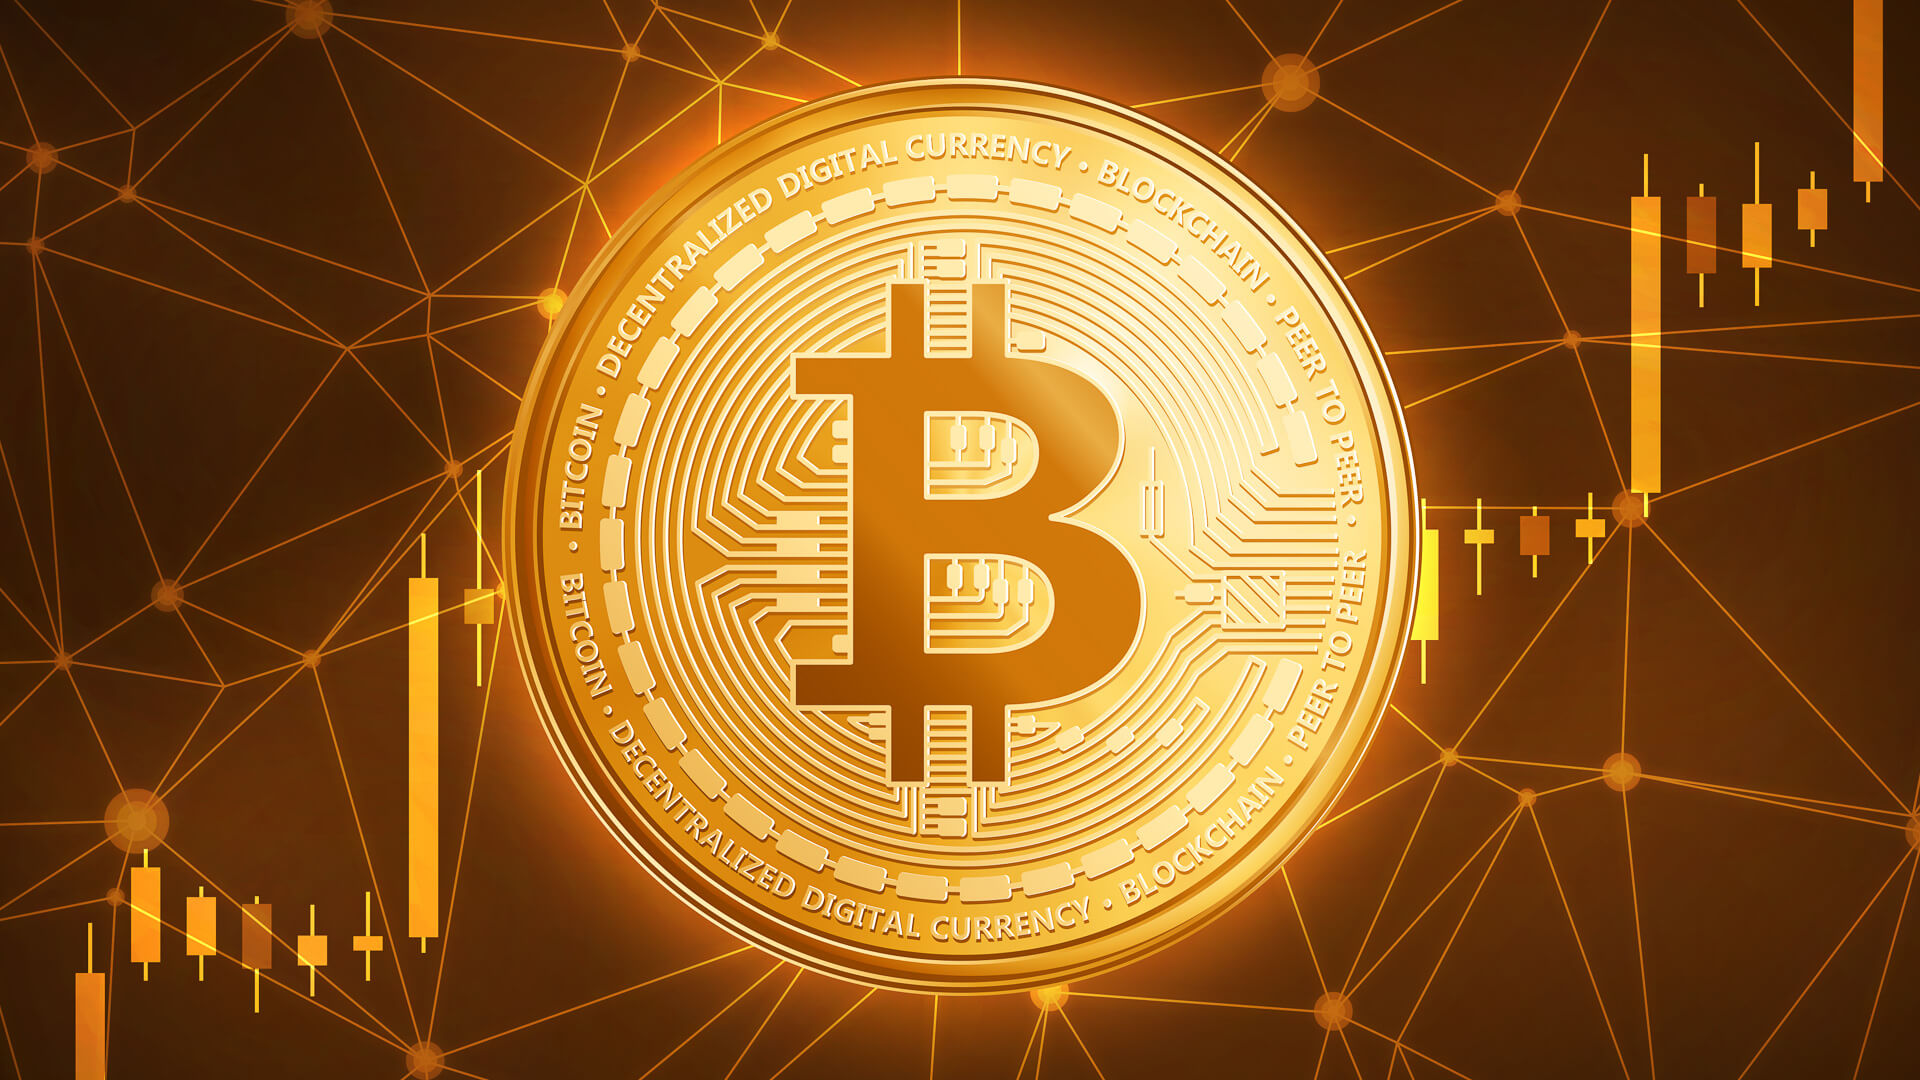

In [1]:
from IPython import display
display.Image("C:\\Users\\admin\\Desktop\\Pic\\Bitcoin2.jpg")


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statistics
import statsmodels
import sklearn
import tensorflow
from tensorflow import keras
from keras.layers import SimpleRNN,LSTM,GRU,Dropout,Dense
from keras.models import Sequential
import warnings
warnings.filterwarnings('ignore')
import scipy


In [3]:
df=pd.read_csv("C:\\Users\\admin\\Documents\\My Tableau Repository\\Datasources\\bitcoin_usd_gwa.csv")
df

,Unnamed: 0,Date,Open,High,Low,Close,Volume,VWAP,TWAP
0,1,2018-03-31,6877.060559,7224.073096,6845.765407,6980.794485,382634.619071,7044.705186,7044.127805
1,2,2018-03-30,7145.558812,7300.913155,6667.086968,6883.725208,609854.553605,6935.257228,6936.282983
2,3,2018-03-29,7983.837144,7996.389607,7005.998073,7154.143491,531839.173256,7535.636043,7574.005265
3,4,2018-03-28,7846.584324,8119.134881,7804.215096,7972.350959,275193.597624,7956.314335,7959.131977
4,5,2018-03-27,8189.532364,8244.970320,7806.926140,7856.948846,357522.246911,8007.858721,8009.491882
...,...,...,...,...,...,...,...,...,...
1181,1182,2015-01-05,262.111956,276.912533,262.111956,272.161003,706159.699523,270.419283,270.369332
1182,1183,2015-01-04,280.648594,284.226130,256.436014,262.204562,946120.852240,271.347063,272.535540
1183,1184,2015-01-03,314.036747,314.054547,283.234550,283.234550,550269.195356,301.560252,303.284471
1184,1185,2015-01-02,313.298509,314.925323,312.753587,314.022867,223533.431312,313.934526,313.940831


In [4]:
df1=df.iloc[:,1:7]
df1

,Date,Open,High,Low,Close,Volume
0,2018-03-31,6877.060559,7224.073096,6845.765407,6980.794485,382634.619071
1,2018-03-30,7145.558812,7300.913155,6667.086968,6883.725208,609854.553605
2,2018-03-29,7983.837144,7996.389607,7005.998073,7154.143491,531839.173256
3,2018-03-28,7846.584324,8119.134881,7804.215096,7972.350959,275193.597624
4,2018-03-27,8189.532364,8244.970320,7806.926140,7856.948846,357522.246911
...,...,...,...,...,...,...
1181,2015-01-05,262.111956,276.912533,262.111956,272.161003,706159.699523
1182,2015-01-04,280.648594,284.226130,256.436014,262.204562,946120.852240
1183,2015-01-03,314.036747,314.054547,283.234550,283.234550,550269.195356
1184,2015-01-02,313.298509,314.925323,312.753587,314.022867,223533.431312


In [5]:
df1.set_index(df1['Date'],inplace=True,drop=True)
df1.drop(columns=['Date'],inplace=True)
df1

,Open,High,Low,Close,Volume
Date,,,,,
2018-03-31,6877.060559,7224.073096,6845.765407,6980.794485,382634.619071
2018-03-30,7145.558812,7300.913155,6667.086968,6883.725208,609854.553605
2018-03-29,7983.837144,7996.389607,7005.998073,7154.143491,531839.173256
2018-03-28,7846.584324,8119.134881,7804.215096,7972.350959,275193.597624
2018-03-27,8189.532364,8244.970320,7806.926140,7856.948846,357522.246911
...,...,...,...,...,...
2015-01-05,262.111956,276.912533,262.111956,272.161003,706159.699523
2015-01-04,280.648594,284.226130,256.436014,262.204562,946120.852240
2015-01-03,314.036747,314.054547,283.234550,283.234550,550269.195356


In [6]:
df1.index=pd.to_datetime(df1.index)

In [7]:
df1

,Open,High,Low,Close,Volume
Date,,,,,
2018-03-31,6877.060559,7224.073096,6845.765407,6980.794485,382634.619071
2018-03-30,7145.558812,7300.913155,6667.086968,6883.725208,609854.553605
2018-03-29,7983.837144,7996.389607,7005.998073,7154.143491,531839.173256
2018-03-28,7846.584324,8119.134881,7804.215096,7972.350959,275193.597624
2018-03-27,8189.532364,8244.970320,7806.926140,7856.948846,357522.246911
...,...,...,...,...,...
2015-01-05,262.111956,276.912533,262.111956,272.161003,706159.699523
2015-01-04,280.648594,284.226130,256.436014,262.204562,946120.852240
2015-01-03,314.036747,314.054547,283.234550,283.234550,550269.195356


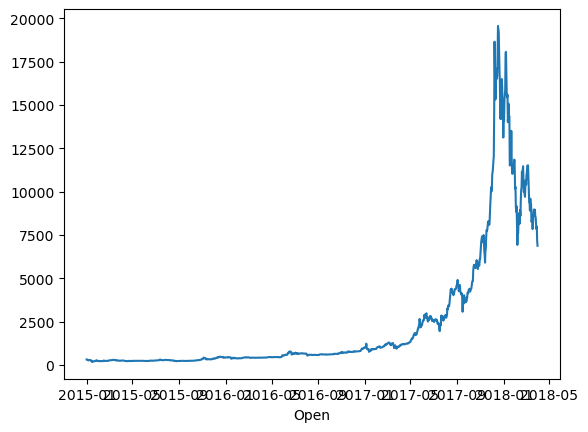

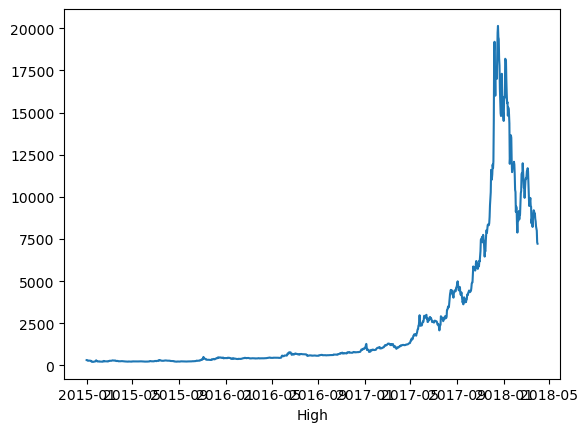

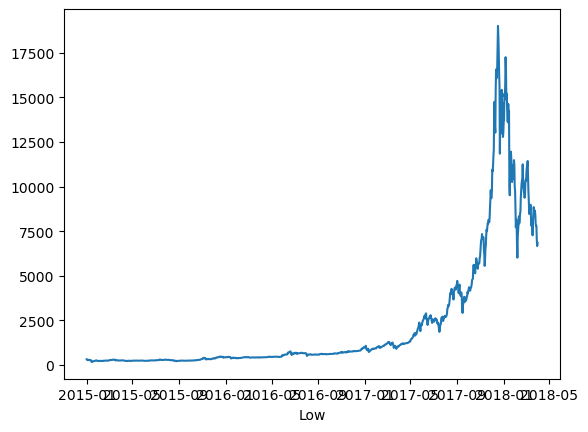

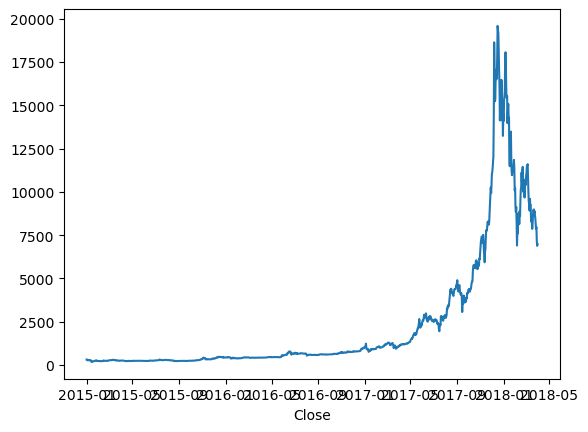

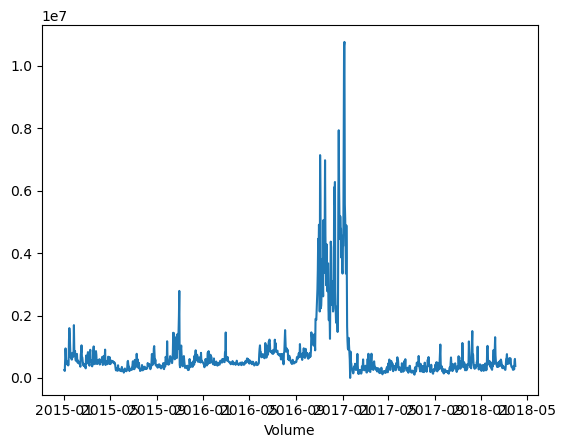

In [8]:
for i in df1.columns:
    plt.plot(df1.index,df1[i])
    plt.xlabel(i)
    plt.show()

In [9]:
df2=df1.sort_index()
df2

,Open,High,Low,Close,Volume
Date,,,,,
2015-01-01,318.724668,318.770152,313.122075,313.326336,253845.174191
2015-01-02,313.298509,314.925323,312.753587,314.022867,223533.431312
2015-01-03,314.036747,314.054547,283.234550,283.234550,550269.195356
2015-01-04,280.648594,284.226130,256.436014,262.204562,946120.852240
2015-01-05,262.111956,276.912533,262.111956,272.161003,706159.699523
...,...,...,...,...,...
2018-03-27,8189.532364,8244.970320,7806.926140,7856.948846,357522.246911
2018-03-28,7846.584324,8119.134881,7804.215096,7972.350959,275193.597624
2018-03-29,7983.837144,7996.389607,7005.998073,7154.143491,531839.173256


##  Data Decomposing  

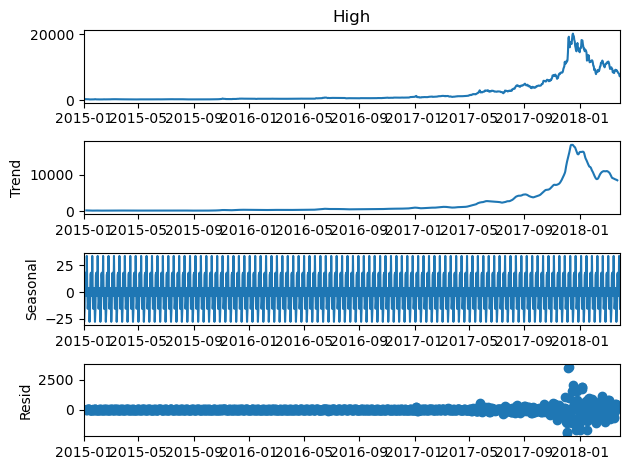

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
sea=seasonal_decompose(df2['High'],period=12)
sea.plot();

In [11]:
df2.shape

(1186, 5)

In [12]:
df2.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [13]:
df2.index.nunique()

1186

In [14]:
df2.describe()

,Open,High,Low,Close,Volume
count,1186.000000,1186.000000,1186.000000,1186.000000,1.186000e+03
mean,2309.310541,2395.072484,2208.844236,2313.742178,7.370351e+05
std,3758.685303,3926.676420,3542.340933,3757.739201,1.012384e+06
min,175.375069,209.576647,163.803860,174.856295,4.832541e+02
25%,304.130186,315.054723,295.252106,304.108394,3.346969e+05
50%,615.309529,619.777259,611.742947,615.910172,4.706209e+05
75%,2393.205743,2534.726271,2307.988772,2428.660243,6.648835e+05
max,19560.217301,20142.121775,19015.719685,19587.374906,1.076697e+07


In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1186 entries, 2015-01-01 to 2018-03-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1186 non-null   float64
 1   High    1186 non-null   float64
 2   Low     1186 non-null   float64
 3   Close   1186 non-null   float64
 4   Volume  1186 non-null   float64
dtypes: float64(5)
memory usage: 87.9 KB


##  Scaling 

In [16]:
high=pd.DataFrame(df2['High'])
high.index=df2.index
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()
high['High']=minmax.fit_transform(high)
high

,High
Date,
2015-01-01,0.005478
2015-01-02,0.005285
2015-01-03,0.005242
2015-01-04,0.003745
2015-01-05,0.003378
...,...
2018-03-27,0.403129
2018-03-28,0.396816
2018-03-29,0.390658


## Train Test Split 

In [17]:
train_len=math.ceil(len(high)*0.8)
train_len

949

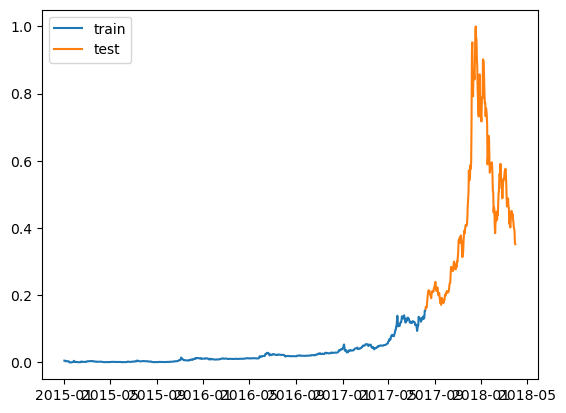

In [18]:
train_ds=high.iloc[:train_len]
test_ds=high.iloc[train_len:]
plt.plot(train_ds,label='train')
plt.plot(test_ds,label='test')
plt.legend()
plt.show()

In [19]:
train_ds.shape,test_ds.shape

((949, 1), (237, 1))

In [20]:
trainx=pd.Series(train_ds['High'].values)
trainx.index=train_ds.index
window=50
x_train=[]
y_train=[]
y_train_ind=[]
for i in range(window,len(trainx)):
    x_train.append(trainx[i-window:i])
    y_train.append(trainx[i])
    y_train_ind.append(trainx.index[i])
x_train1=np.array(x_train)    
y_train1=np.array(y_train)
x_train1.shape,y_train1.shape

((899, 50), (899,))

In [21]:
testx=pd.Series(test_ds['High'].values)
testx.index=test_ds.index
x_test=[]
y_test=[]
y_test_ind=[]
for t in range(window,len(testx)):
    x_test.append(testx[t-window:t])
    y_test.append(testx[t])
    y_test_ind.append(testx.index[t])
x_test1=np.array(x_test)    
y_test1=np.array(y_test)
x_test1.shape,y_test1.shape

((187, 50), (187,))

In [22]:
#Reshaping
x_train1=np.reshape(x_train1,(x_train1.shape[0],x_train1.shape[1],1))
x_test1=np.reshape(x_test1,(x_test1.shape[0],x_test1.shape[1],1))
x_train1.shape,x_test1.shape,y_train1.shape,y_test1.shape

((899, 50, 1), (187, 50, 1), (899,), (187,))

# LSTM

In [23]:
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

In [24]:
pwd

'C:\\Users\\admin'

In [25]:
path='C:\\Users\\admin\\LSTM-{epoch:02d}-{loss:.6f}.h5'
callback1=ModelCheckpoint(filepath=path,monitor='val_loss',save_best_only=True,mode='min',verbose=1)

In [26]:
#model
model=Sequential()
model.add(LSTM(50,activation='relu',input_shape=(x_train1.shape[1],1)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [28]:
H1=model.fit(x_train1,y_train1,validation_data=(x_test1,y_test1),epochs=100,callbacks=[callback1])

Epoch 1/100
29/29 [==============================] - ETA: 0s - loss: 6.1413e-04
Epoch 1: val_loss improved from inf to 0.06095, saving model to C:\Users\admin\LSTM-01-0.000614.h5
29/29 [==============================] - 5s 50ms/step - loss: 6.1413e-04 - val_loss: 0.0609
Epoch 2/100
28/29 [===========================>..] - ETA: 0s - loss: 3.4726e-05
Epoch 2: val_loss improved from 0.06095 to 0.01765, saving model to C:\Users\admin\LSTM-02-0.000035.h5
29/29 [==============================] - 1s 38ms/step - loss: 3.4619e-05 - val_loss: 0.0177
Epoch 3/100
27/29 [==========================>...] - ETA: 0s - loss: 1.6999e-05
Epoch 3: val_loss improved from 0.01765 to 0.01324, saving model to C:\Users\admin\LSTM-03-0.000017.h5
29/29 [==============================] - 1s 33ms/step - loss: 1.6973e-05 - val_loss: 0.0132
Epoch 4/100
29/29 [==============================] - ETA: 0s - loss: 1.5154e-05
Epoch 4: val_loss did not improve from 0.01324
29/29 [==============================] - 1s 28ms/ste

In [29]:
lstm=load_model("C:\\Users\\admin\\Downloads\\LSTM-50-0.0000.h5")

In [30]:
lstm_pre=lstm.predict(x_test1)

6/6 [==============================] - 0s 12ms/step


In [31]:
dff1=pd.DataFrame({'Actual':list(y_test1),'Predicted':list(lstm_pre)})
data=minmax.inverse_transform(dff1)
dff2=pd.DataFrame(data,columns=['Actual','Predicted'])
dff2.index=y_test_ind

In [32]:
dff2

,Actual,Predicted
2017-09-26,3924.336466,3950.235857
2017-09-27,4184.147135,3977.984473
2017-09-28,4230.190465,4074.462476
2017-09-29,4183.883032,4162.924852
2017-09-30,4331.746841,4219.468479
...,...,...
2018-03-27,8244.970320,8503.679071
2018-03-28,8119.134881,8370.683290
2018-03-29,7996.389607,8238.276794
2018-03-30,7300.913155,8105.421206


## Actual vs predicted plot 

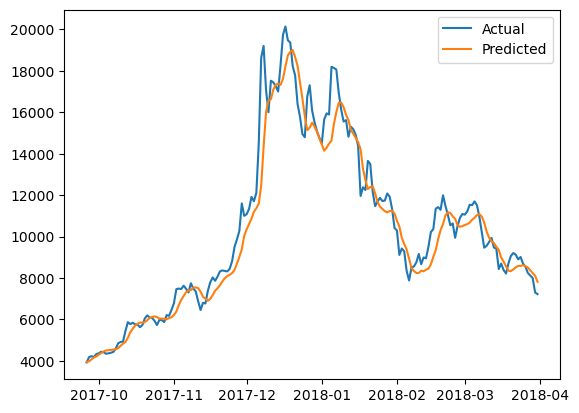

In [33]:
plt.plot(dff2['Actual'],label='Actual')
plt.plot(dff2['Predicted'],label='Predicted')
plt.legend()
plt.show()

In [34]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(dff2['Actual'],dff2['Predicted'])
rmse=(mse)**(1/2)
r2=r2_score(dff2['Actual'],dff2['Predicted'])

In [35]:
print('mse value is = '+str(mse))
print('rmse value is = '+str(rmse))
print('r2 values is = '+str(r2))

mse value is = 1079798.113118226
rmse value is = 1039.1333471303026
r2 values is = 0.9351564431163609


## Plotting training and validation loss  

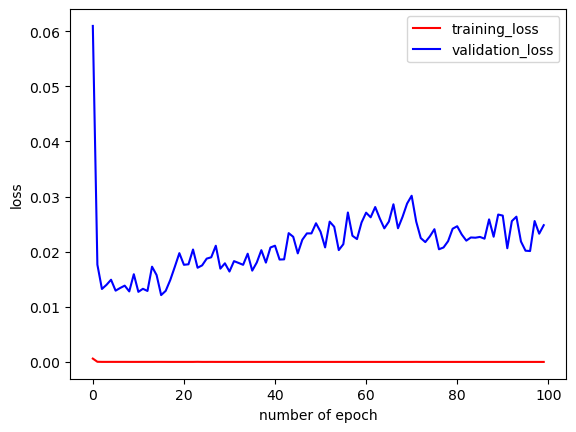

In [36]:
plt.plot(H1.epoch,H1.history['loss'],color='red',label='training_loss')
plt.plot(H1.epoch,H1.history['val_loss'],color='blue',label='validation_loss')
plt.xlabel('number of epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

## Monthly Data 

In [37]:
df7=df2.resample('M').mean()

In [38]:
df7.shape

(39, 5)

In [39]:
df7

,Open,High,Low,Close,Volume
Date,,,,,
2015-01-31,250.079453,259.198733,238.784512,246.854241,7.260518e+05
2015-02-28,232.909751,239.691984,228.034257,234.202741,5.364277e+05
2015-03-31,269.713983,274.685132,263.344970,269.428673,6.032477e+05
2015-04-30,236.314618,239.502571,232.003018,236.003031,5.508999e+05
2015-05-31,238.160406,240.577090,235.919310,238.092387,3.797791e+05
2015-06-30,238.422343,241.768648,236.151322,239.476163,3.020126e+05
2015-07-31,279.767948,285.677089,275.211056,280.390875,3.787080e+05
2015-08-31,252.861264,255.985279,247.516706,251.035504,4.613195e+05
2015-09-30,235.453808,238.004292,233.675304,235.724179,4.364622e+05


## Month wise Open, High, Low, Close Plot

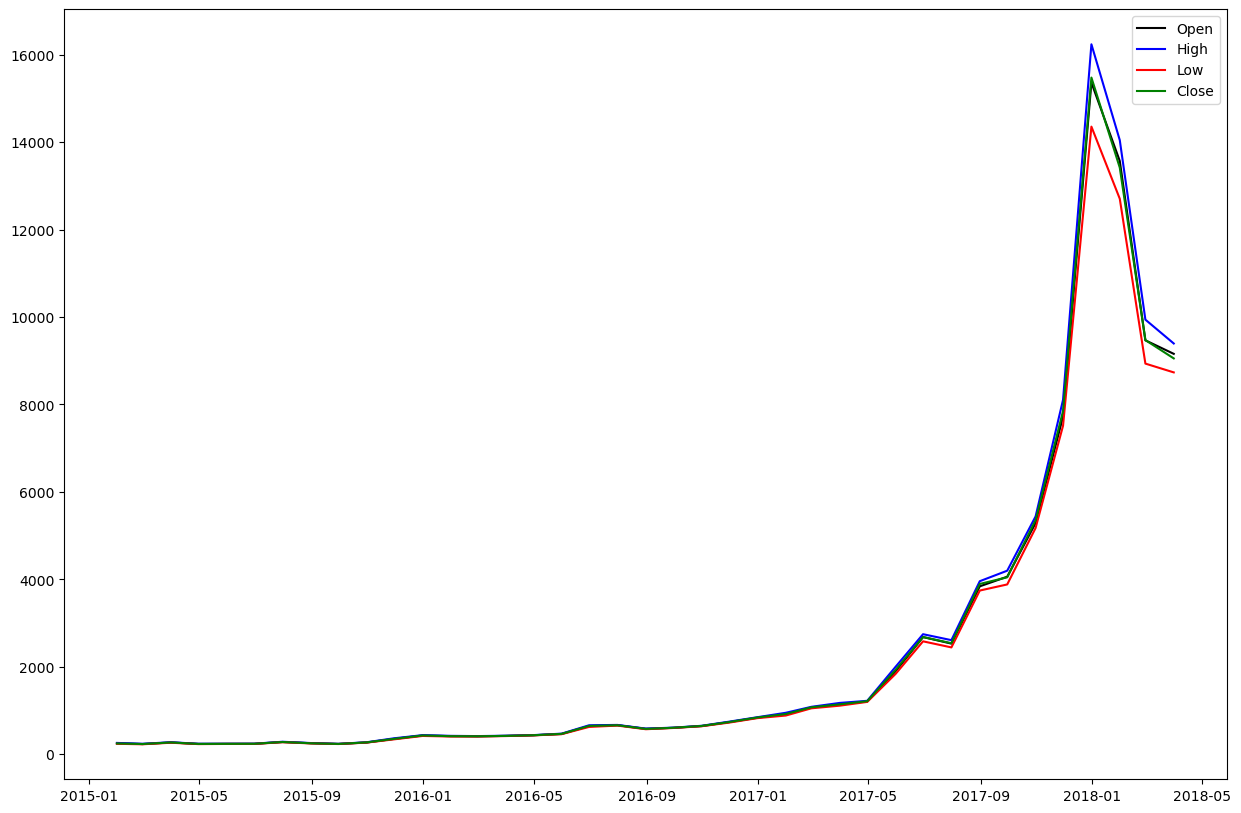

In [40]:
plt.figure(figsize=(15,10))
plt.plot(df7.index,df7['Open'],color='black',label='Open')
plt.plot(df7.index,df7['High'],color='blue',label='High')
plt.plot(df7.index,df7['Low'],color='red',label='Low')
plt.plot(df7.index,df7['Close'],color='green',label='Close')
plt.legend()
plt.show()

In [41]:
m_lis=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

In [42]:
ind=[]
c=[]
for i in df7.index:
    ind.append(i)
for y in range(0,len(ind),12):
    c.append(ind[y:y+12])
df_2015 = df7[(df7.index >=c[0][0] ) & (df7.index <= c[0][11])]
df_2016= df7[(df7.index >= c[1][0]) & (df7.index <= c[1][11])]
df_2017 = df7[(df7.index >= c[2][0]) & (df7.index <=c[2][11])]
df_2018= df7[(df7.index >= c[3][0]) & (df7.index <= c[3][2])]   

In [43]:
set1=[df_2015,df_2016,df_2017,df_2018]
for s in set1:
    if s.shape[0]==12:
        s.insert(0,'month',m_lis)
    elif s.shape[0]== 3:
        s.insert(0,'month',m_lis[0:3])

## Year 2015 

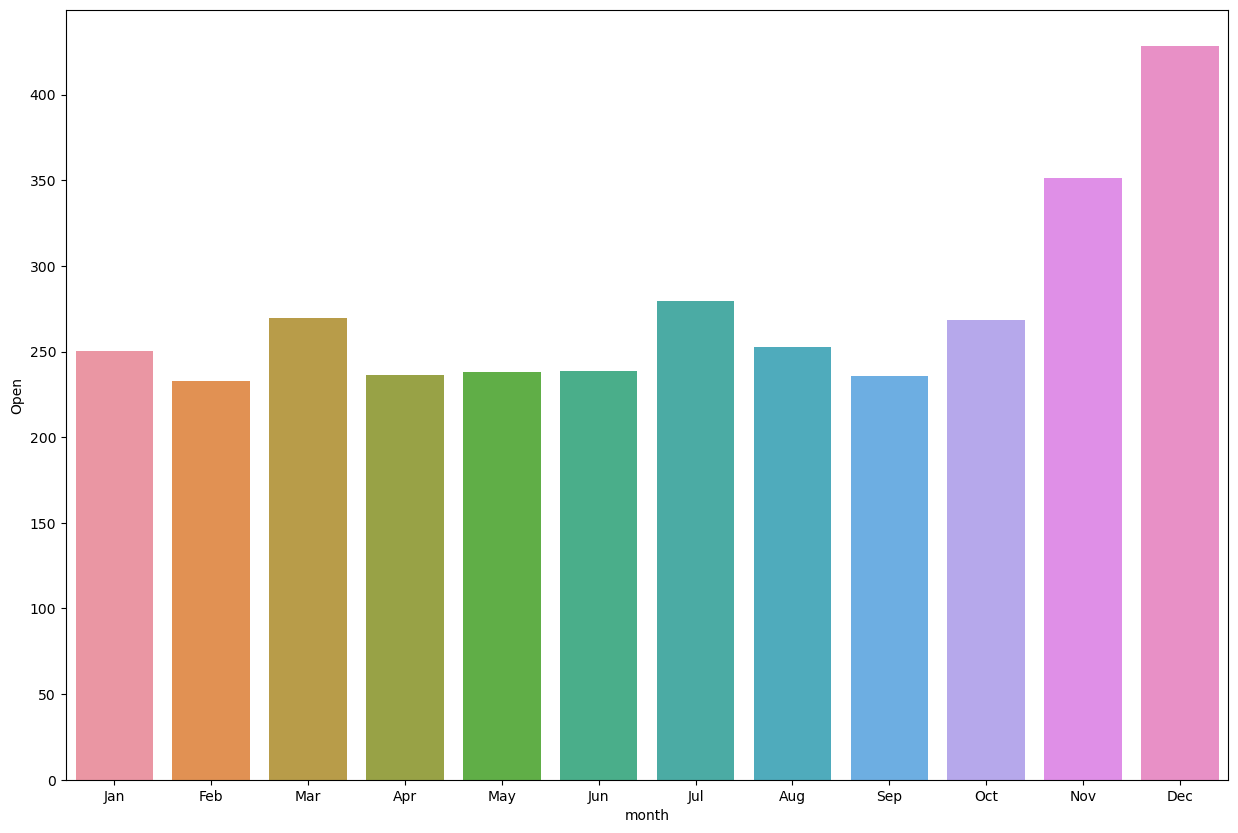

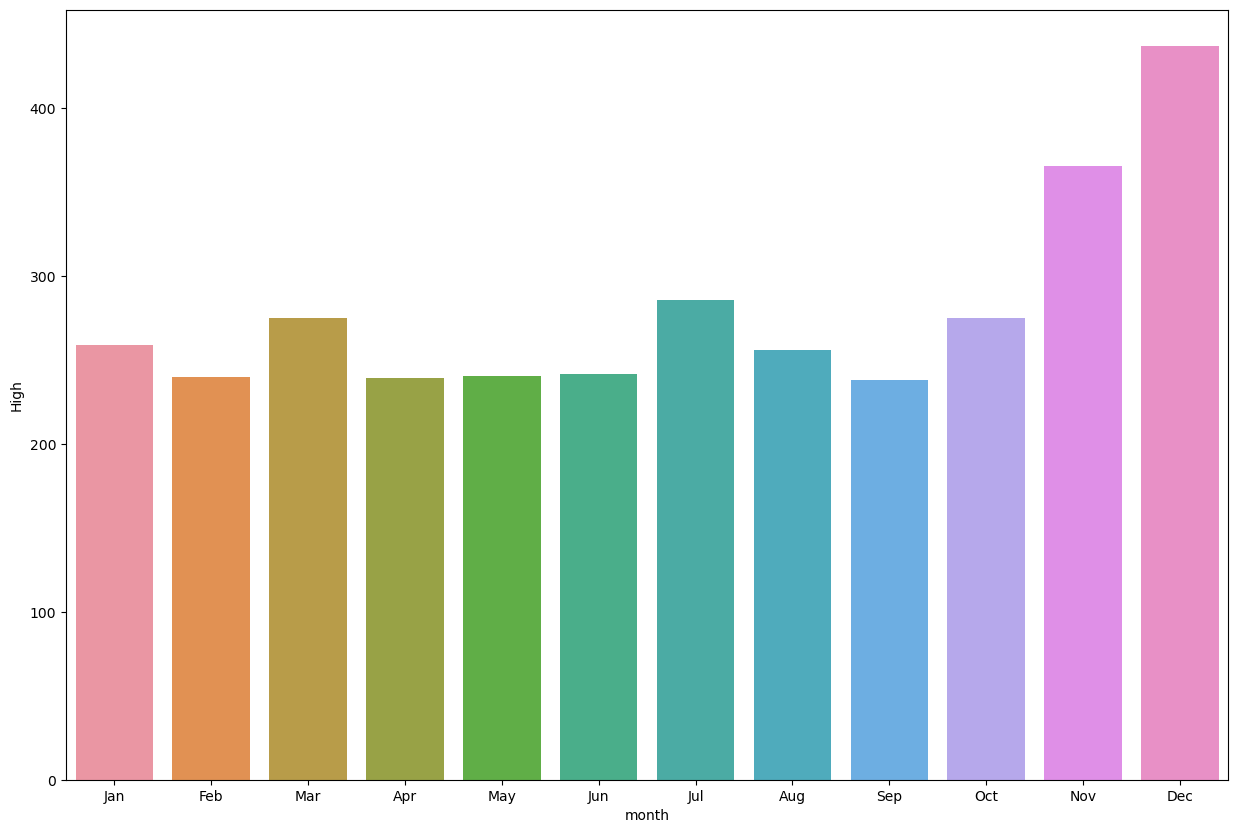

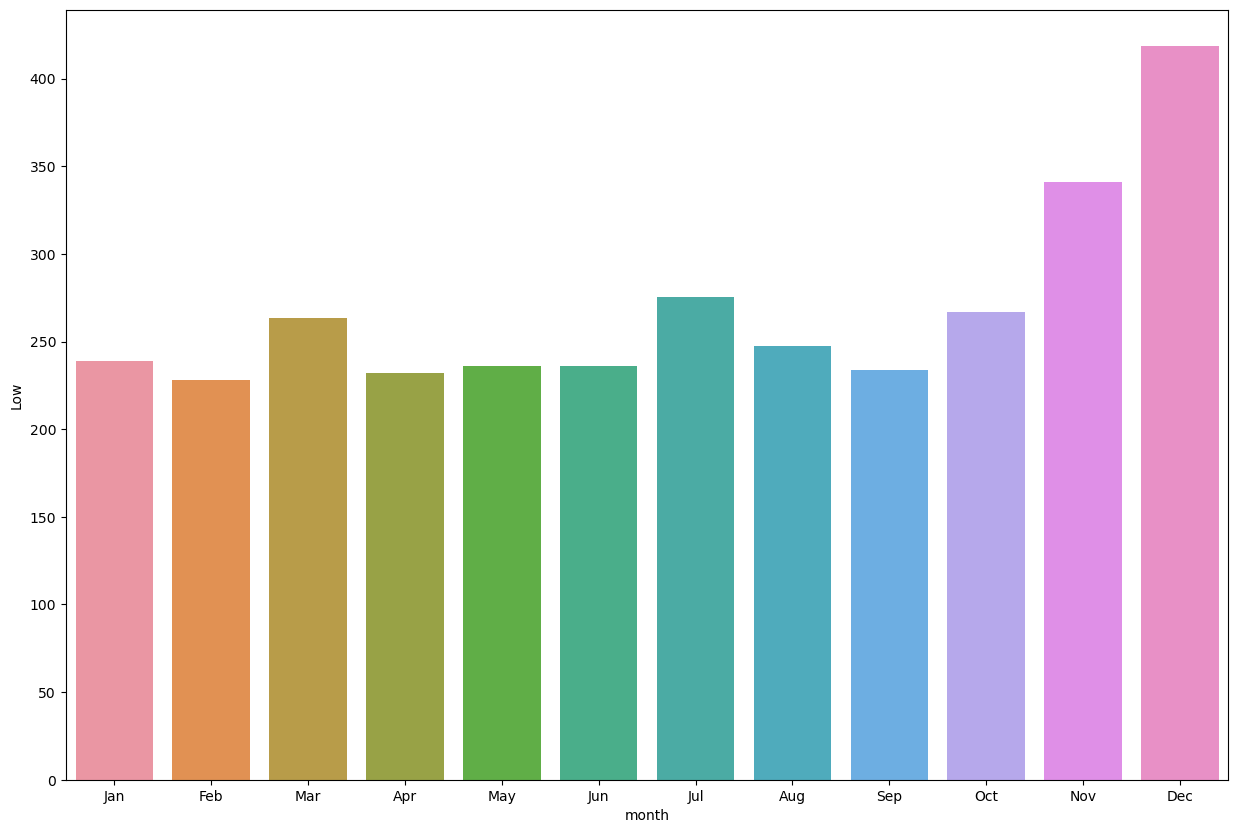

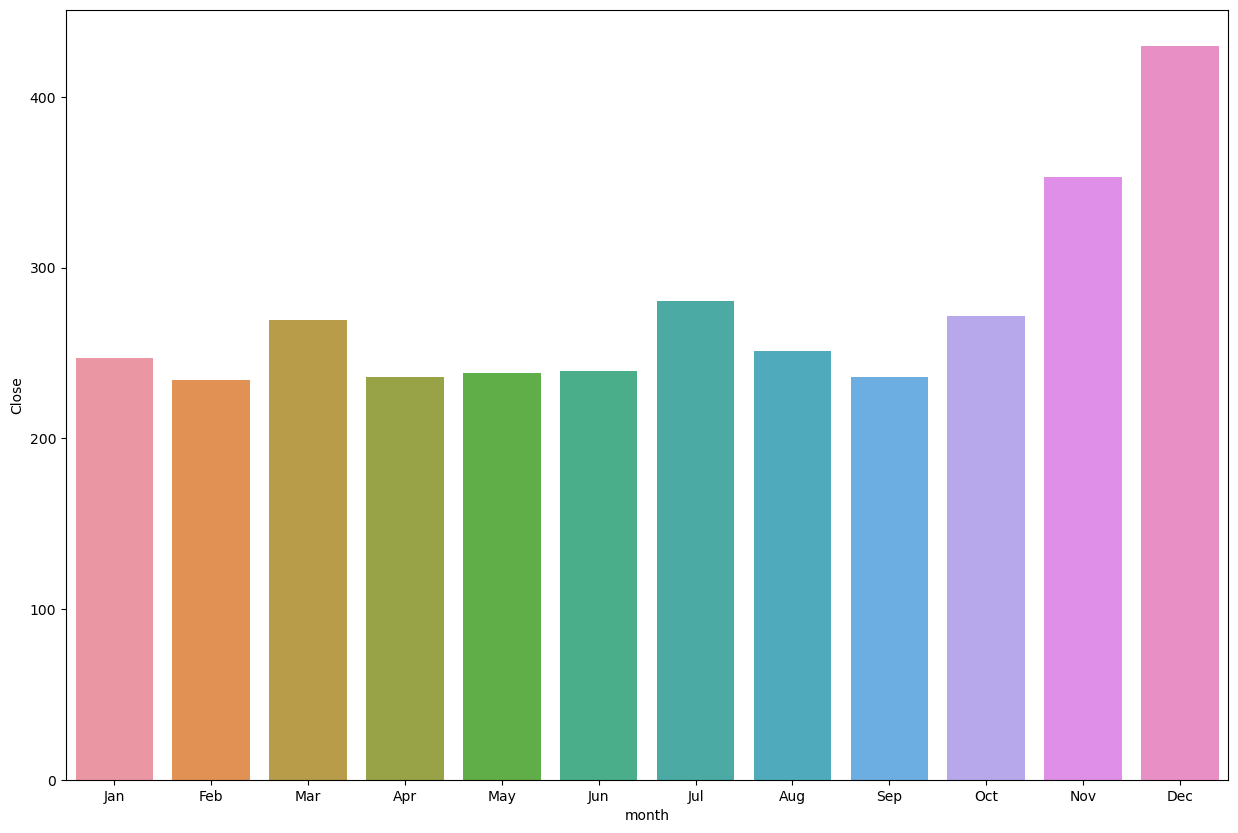

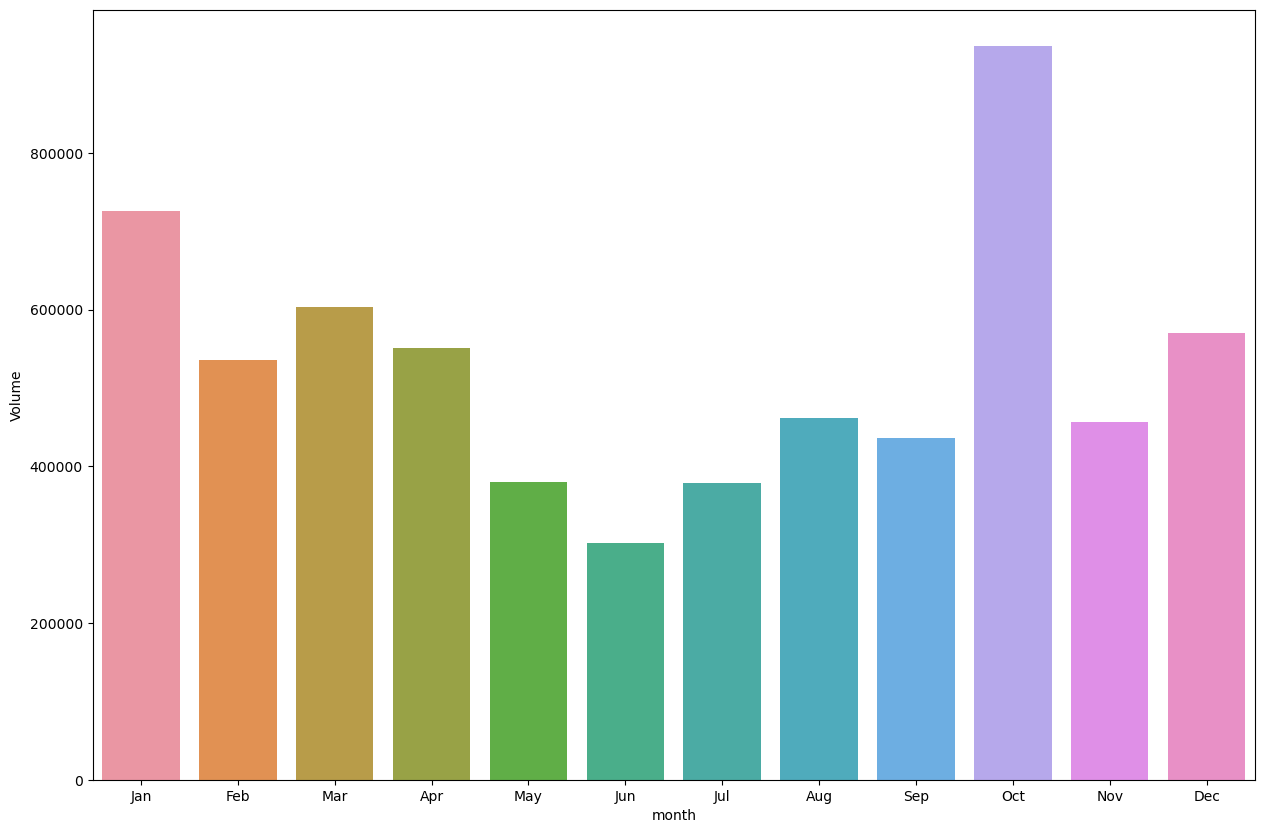

In [44]:
for i in df_2015.iloc[:,1:].columns:
    plt.figure(figsize=(15,10))
    sns.barplot(df_2015['month'],df_2015[i])

## Year 2016 

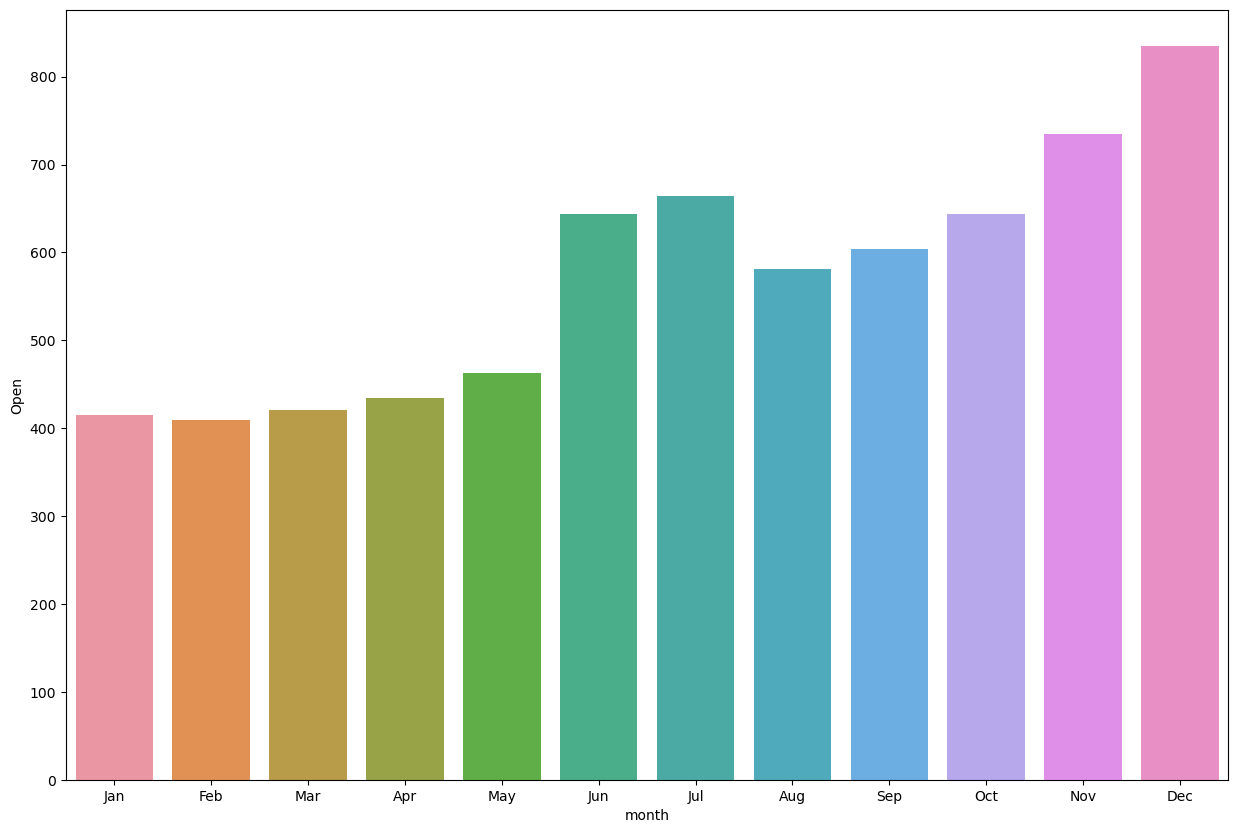

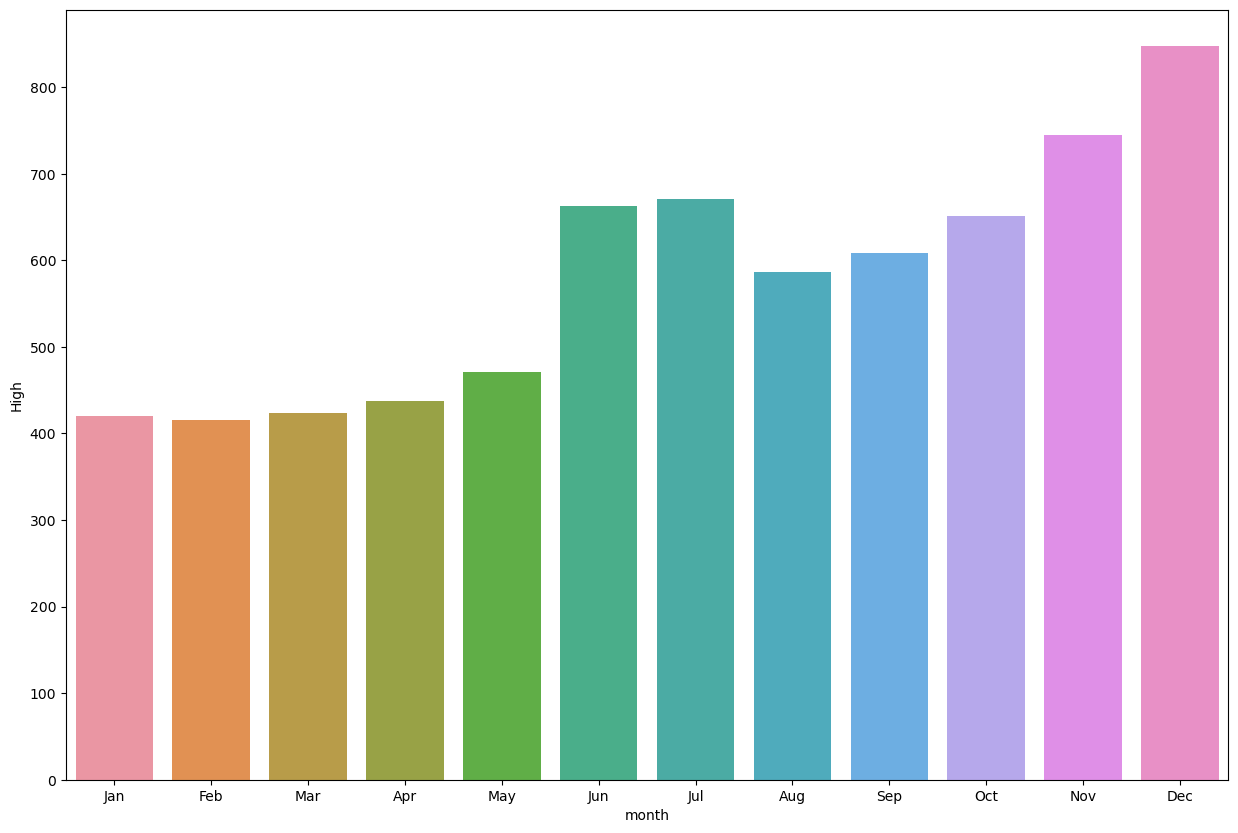

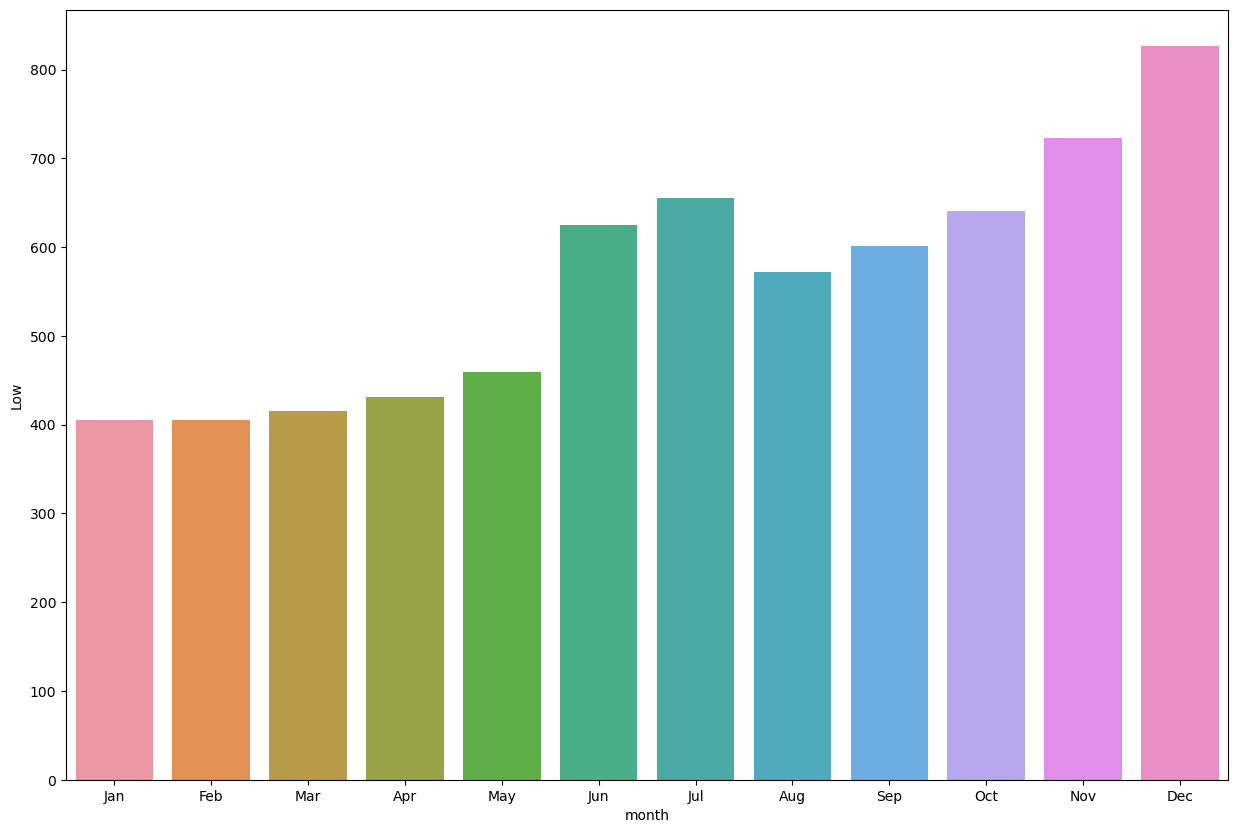

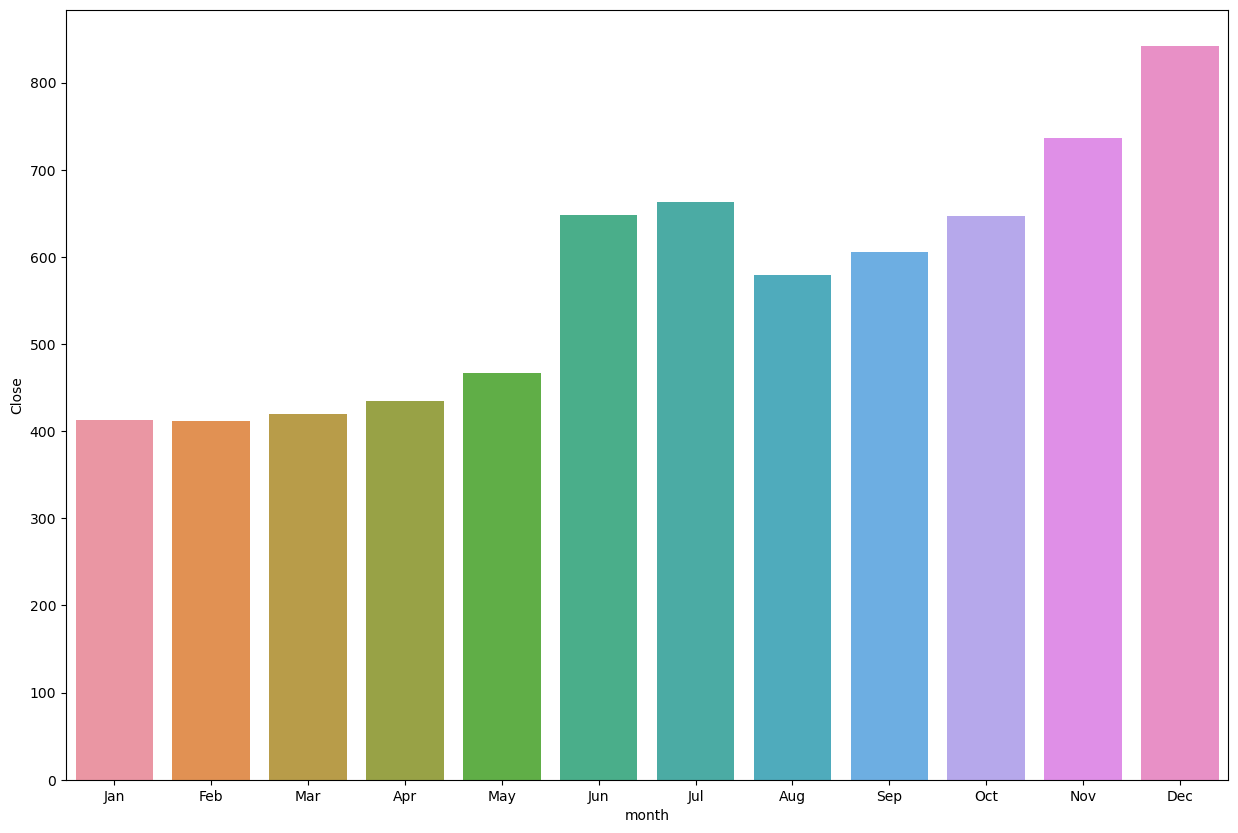

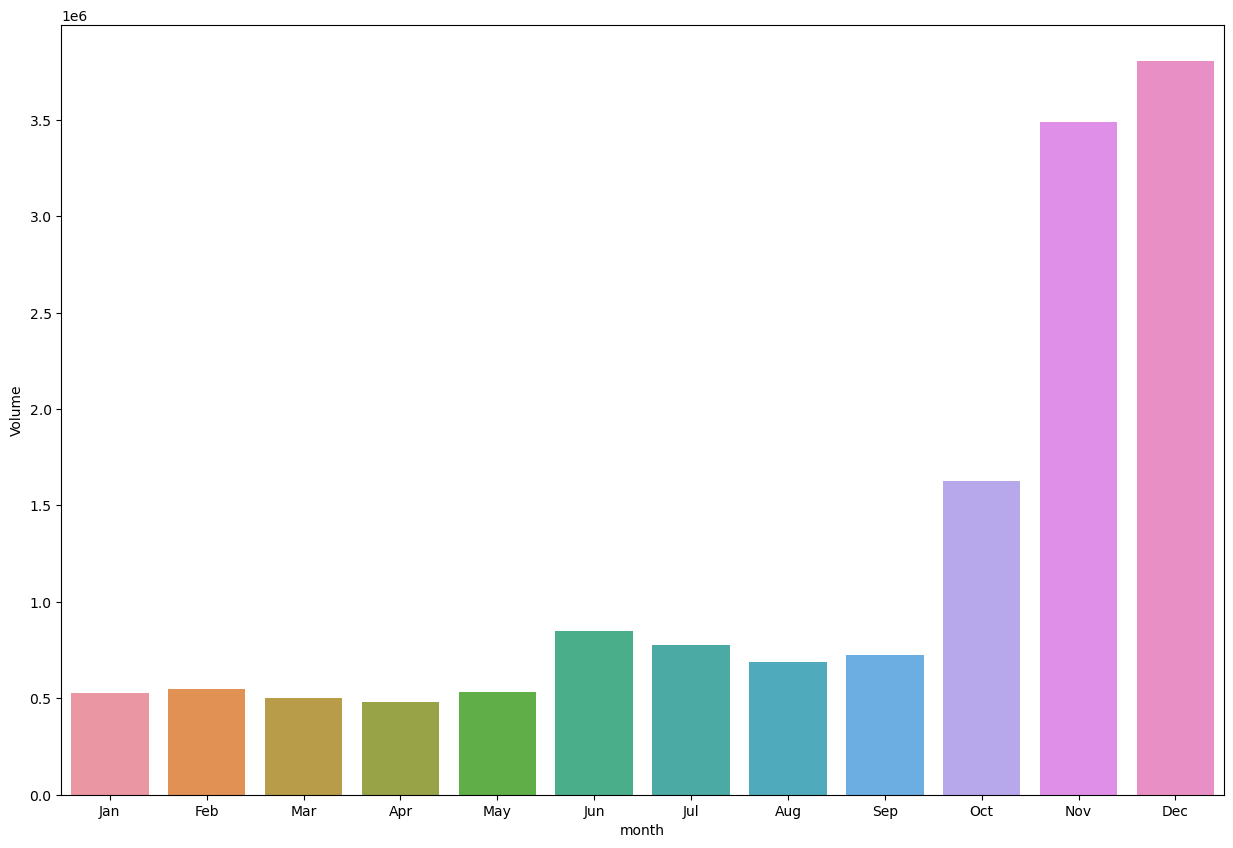

In [45]:
for i in df_2016.iloc[:,1:].columns:
    plt.figure(figsize=(15,10))
    sns.barplot(df_2016['month'],df_2016[i])

## Year 2017 

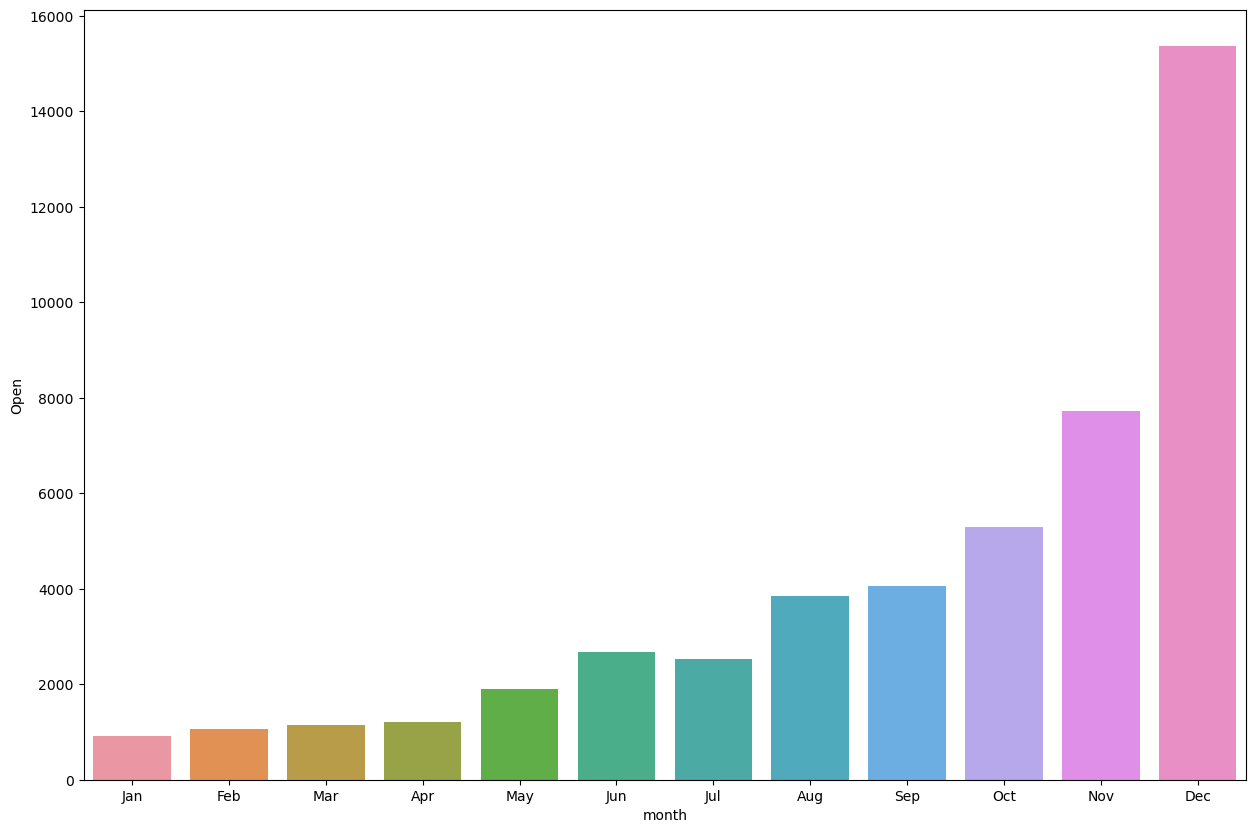

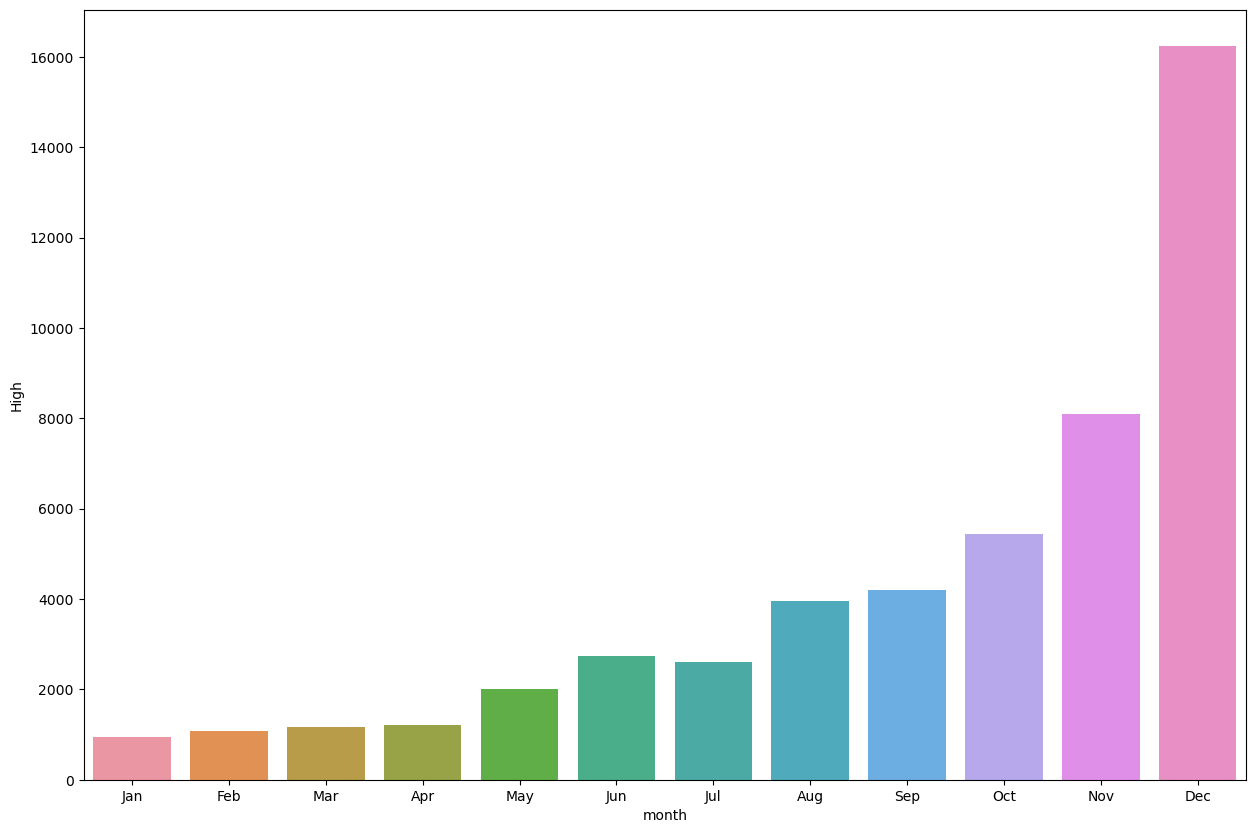

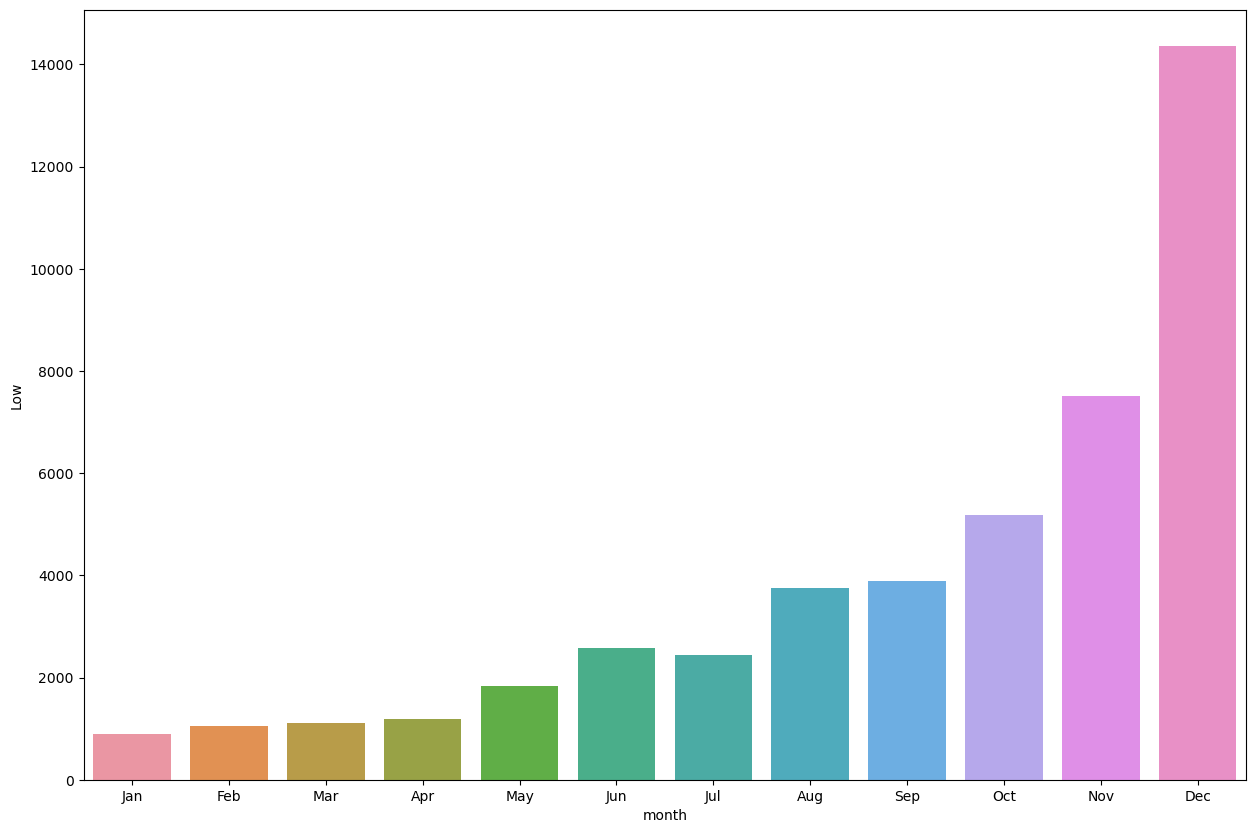

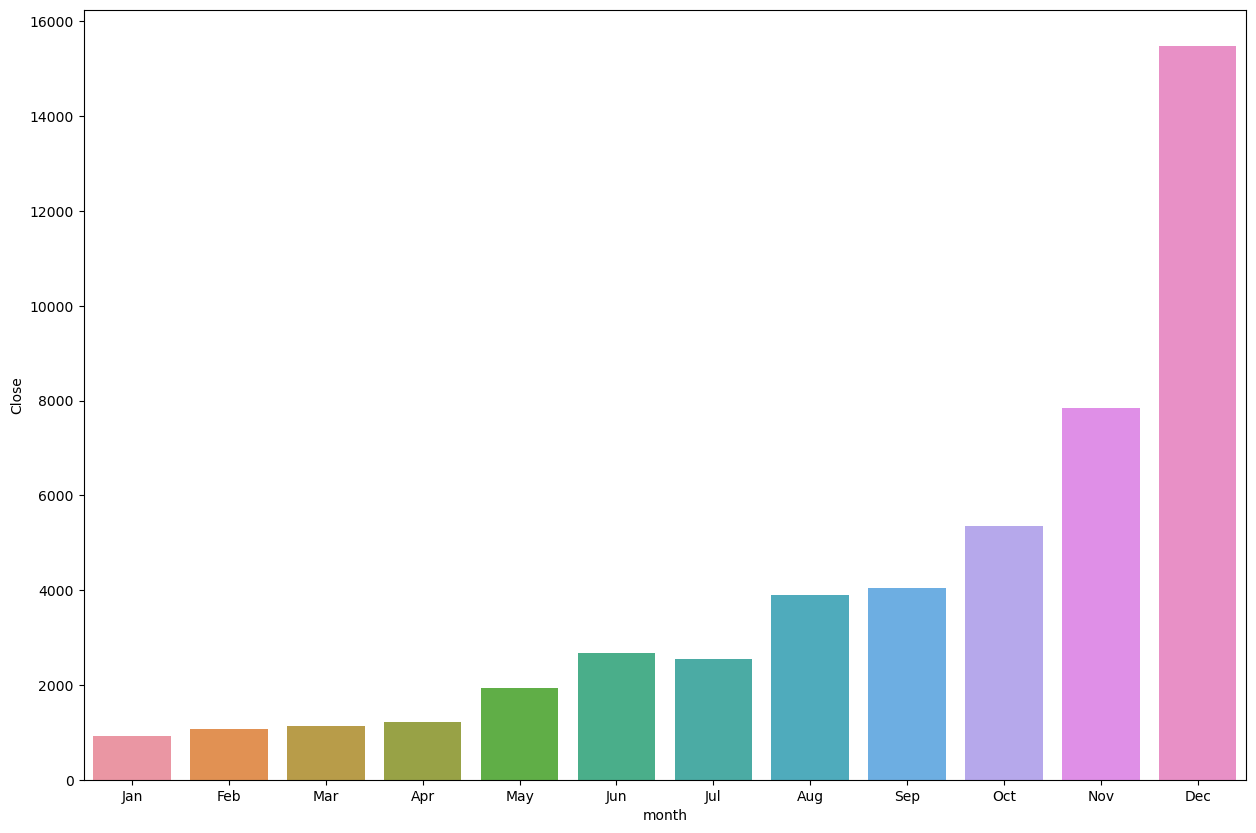

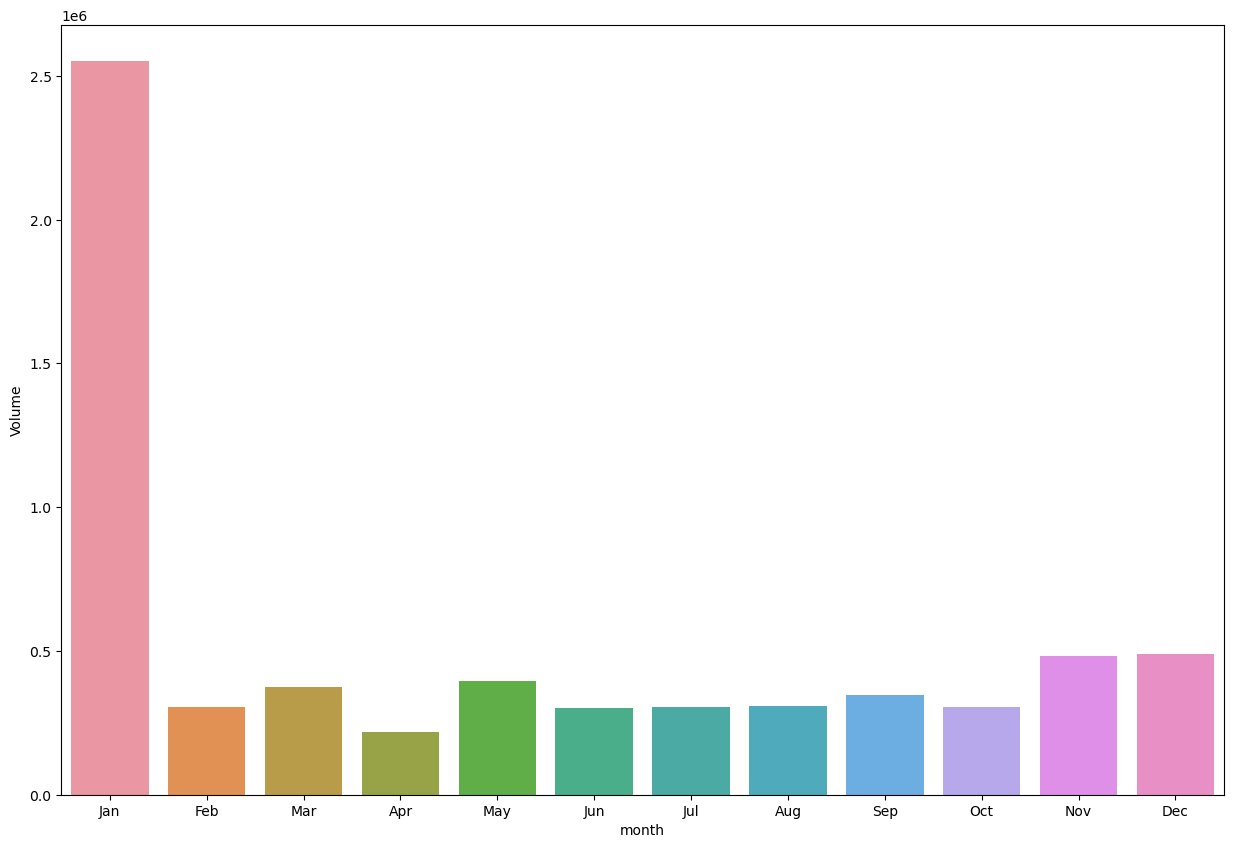

In [46]:
for i in df_2017.iloc[:,1:].columns:
    plt.figure(figsize=(15,10))
    sns.barplot(df_2017['month'],df_2017[i])

## Year 2018 

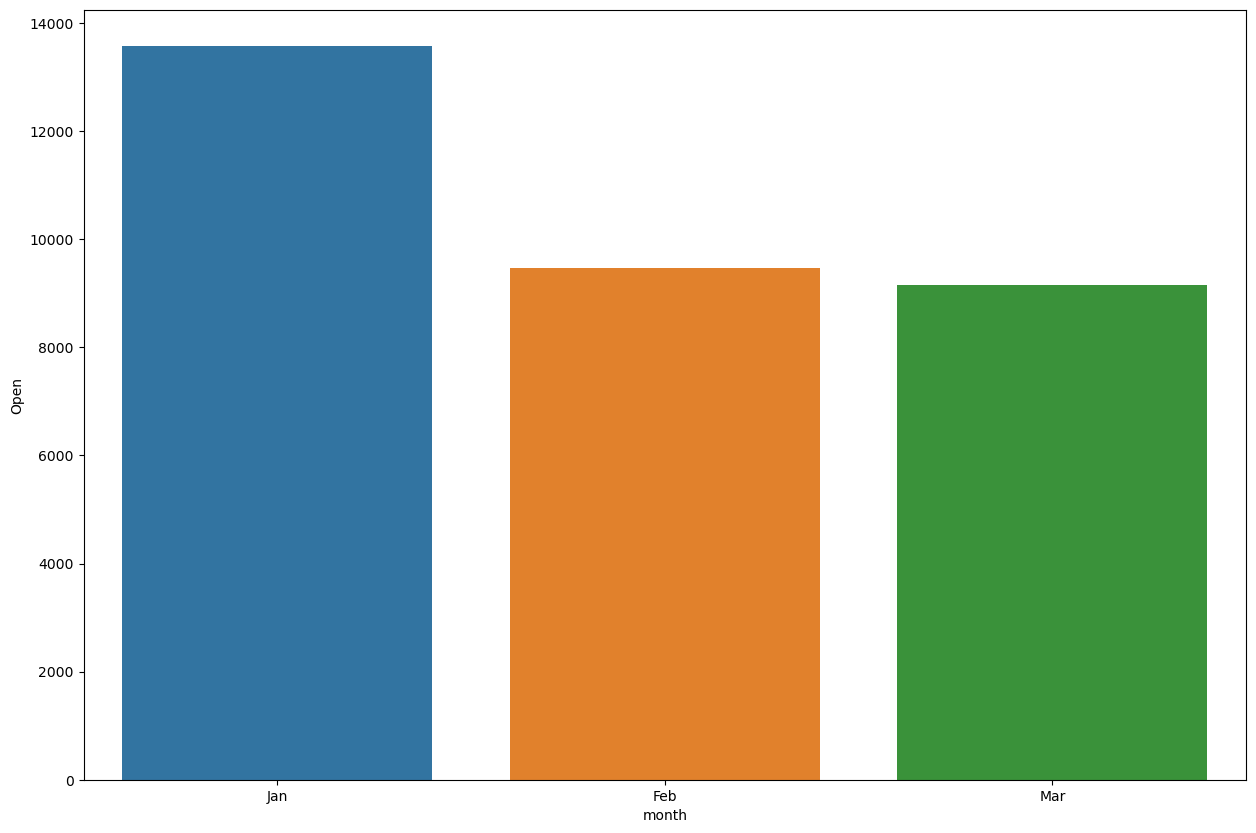

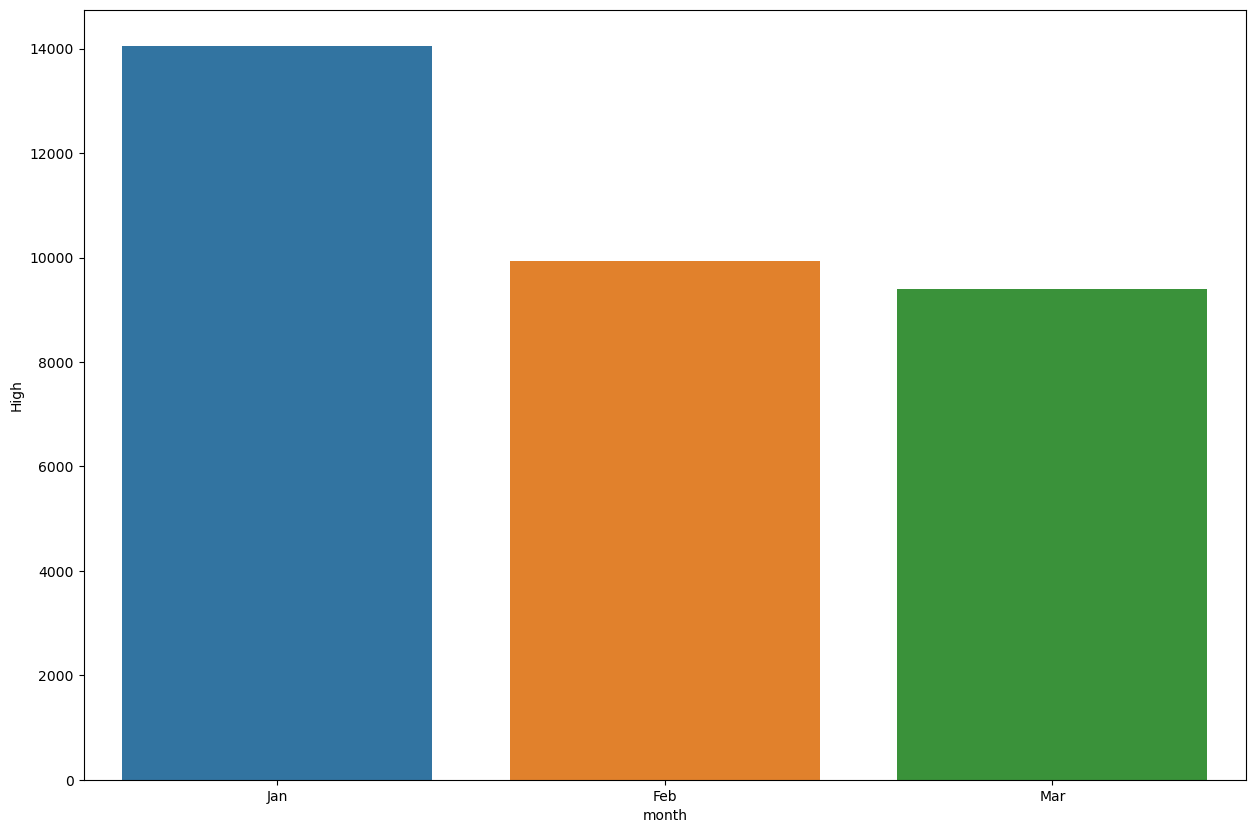

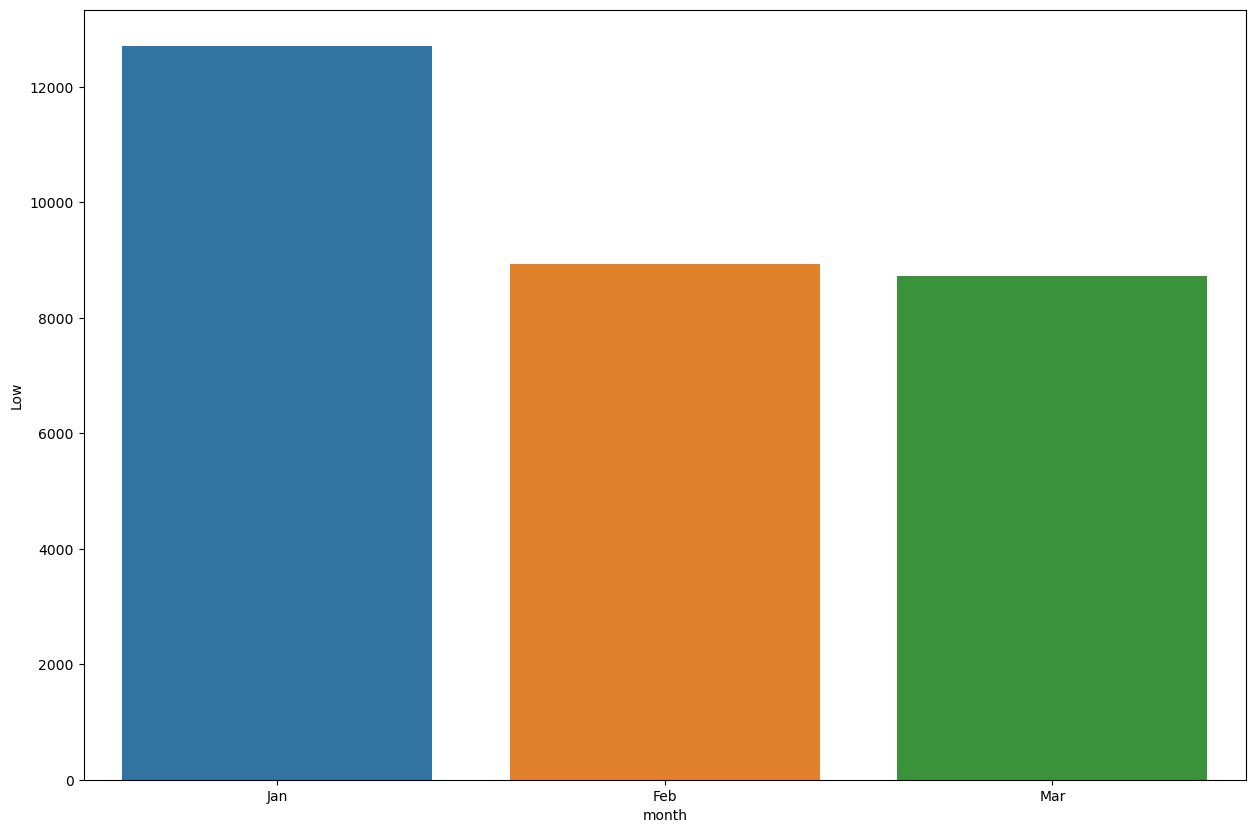

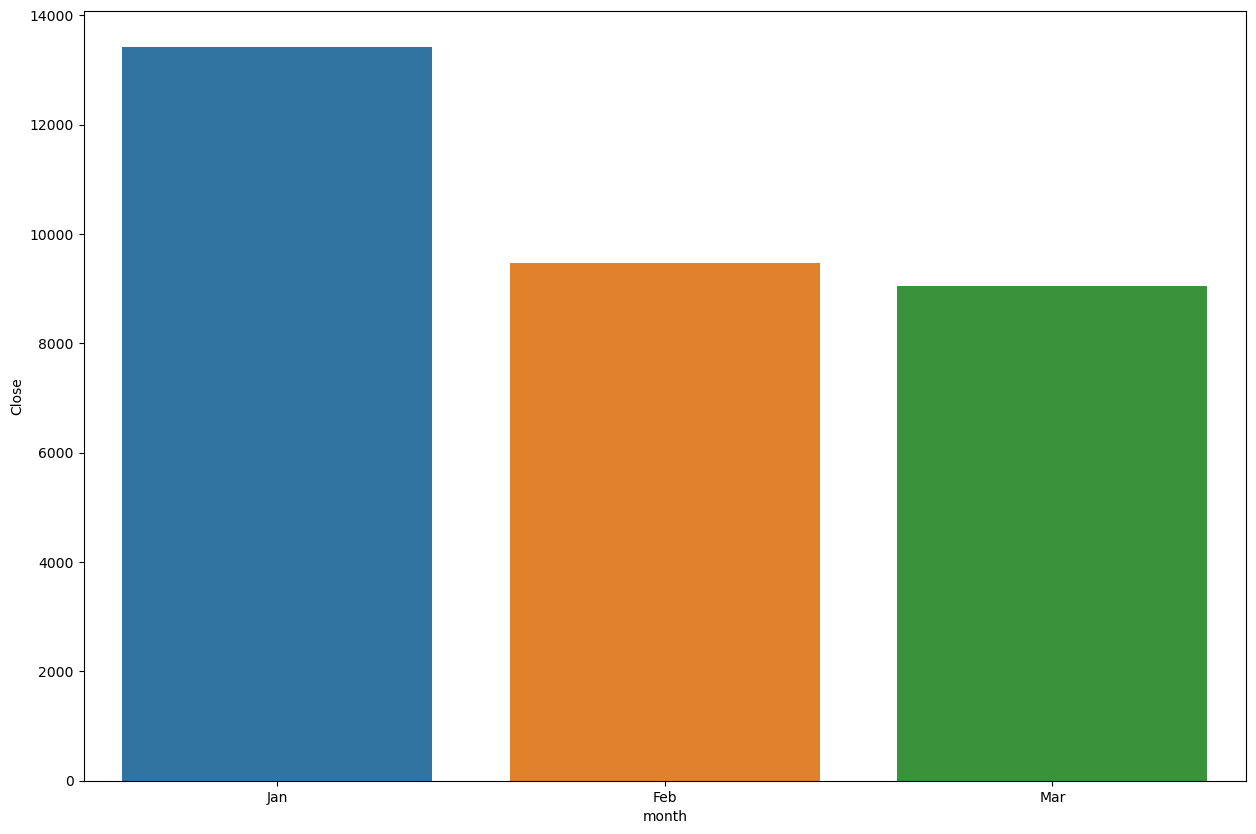

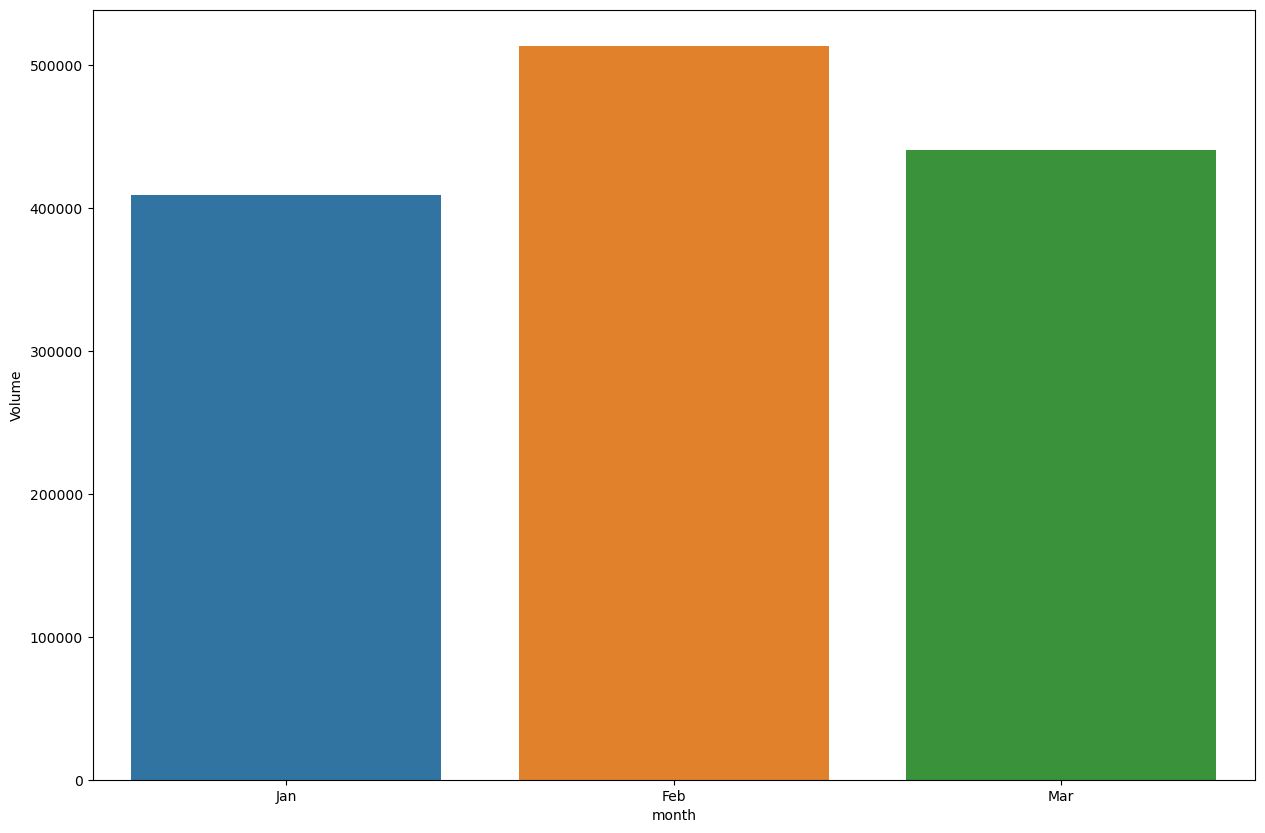

In [47]:
for i in df_2018.iloc[:,1:].columns:
    plt.figure(figsize=(15,10))
    sns.barplot(df_2018['month'],df_2018[i])

# Simple RNN

In [48]:
path2='C:\\Users\\admin\\simple_RNN-{epoch:02d}-{loss:.6f}.h5'
callback2=ModelCheckpoint(filepath=path2,monitor='val_loss',mode='min',save_best_only=True,verbose=1)

In [49]:
model2=Sequential()
model2.add(SimpleRNN(50,activation='relu',input_shape=(x_train1.shape[1],1)))
model2.add(Dense(1))
model2.compile(optimizer='adam',loss='mse')

In [50]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50)                2600      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [51]:
H3=model2.fit(x_train1,y_train1,validation_data=(x_test1,y_test1),callbacks=[callback2],epochs=100)

Epoch 1/100
27/29 [==========================>...] - ETA: 0s - loss: 5.9571e-04
Epoch 1: val_loss improved from inf to 0.05823, saving model to C:\Users\admin\simple_RNN-01-0.000574.h5
29/29 [==============================] - 2s 22ms/step - loss: 5.7384e-04 - val_loss: 0.0582
Epoch 2/100
26/29 [=========================>....] - ETA: 0s - loss: 1.9820e-05
Epoch 2: val_loss improved from 0.05823 to 0.02168, saving model to C:\Users\admin\simple_RNN-02-0.000020.h5
29/29 [==============================] - 0s 16ms/step - loss: 1.9535e-05 - val_loss: 0.0217
Epoch 3/100
24/29 [=======================>......] - ETA: 0s - loss: 1.1394e-05
Epoch 3: val_loss did not improve from 0.02168
29/29 [==============================] - 0s 13ms/step - loss: 1.0202e-05 - val_loss: 0.0222
Epoch 4/100
24/29 [=======================>......] - ETA: 0s - loss: 8.4688e-06
Epoch 4: val_loss did not improve from 0.02168
29/29 [==============================] - 0s 14ms/step - loss: 8.8970e-06 - val_loss: 0.0229
Epoc

In [52]:
RNN_model=load_model("C:\\Users\\admin\\Downloads\\simple_RNN-71-0.000006.h5")

In [53]:
RNN_pre=RNN_model.predict(x_test1)

6/6 [==============================] - 0s 5ms/step


In [54]:
rnn_df=pd.DataFrame({'Actual':list(y_test1),'Predicted':list(RNN_pre)})
rnn_forcast=minmax.inverse_transform(rnn_df)
rnn_prediction=pd.DataFrame(rnn_forcast,columns=['Actual','Predicted'])
rnn_prediction.index=y_test_ind
rnn_prediction

,Actual,Predicted
2017-09-26,3924.336466,3963.473656
2017-09-27,4184.147135,3994.891930
2017-09-28,4230.190465,4200.152206
2017-09-29,4183.883032,4277.118498
2017-09-30,4331.746841,4258.820106
...,...,...
2018-03-27,8244.970320,8409.144754
2018-03-28,8119.134881,8163.120530
2018-03-29,7996.389607,8003.572523
2018-03-30,7300.913155,7883.445347


## Actual vs Predicted plot 

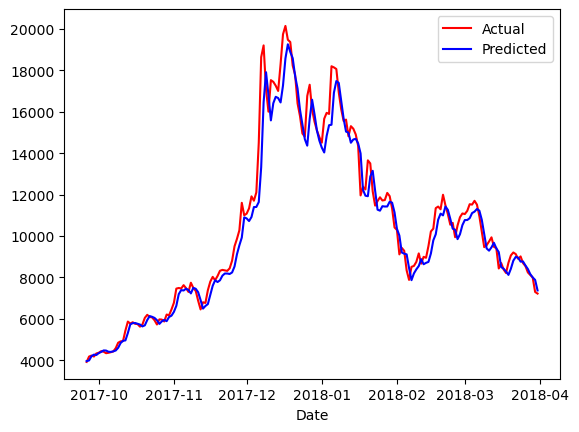

In [55]:
plt.plot(rnn_prediction.index,rnn_prediction['Actual'],color='red',label='Actual')
plt.plot(rnn_prediction.index,rnn_prediction['Predicted'],color='blue',label='Predicted')
plt.xlabel('Date')
plt.legend()
plt.show()

In [56]:
mse2=mean_squared_error(rnn_prediction['Actual'],rnn_prediction['Predicted'])
print('The mse score is = {}'.format(mse2))
print('The rmse value is = {}'.format((mse2)**(1/2)))
print('R2 value is = {}'.format(r2_score(rnn_prediction['Actual'],rnn_prediction['Predicted'])))

The mse score is = 671825.8469596182
The rmse value is = 819.6498319158115
R2 value is = 0.9596558125134866


## Plotting training and validation loss 

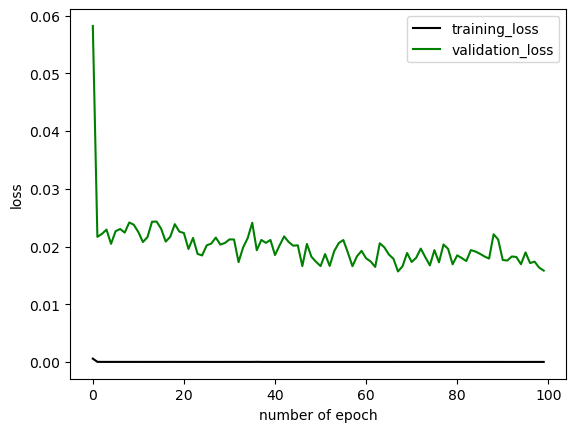

In [57]:
plt.plot(H3.epoch,H3.history['loss'],color='black',label='training_loss')
plt.plot(H3.epoch,H3.history['val_loss'],color='green',label='validation_loss')
plt.xlabel('number of epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

# GRU

In [58]:
path3="C:\\Users\\admin\\GRU_re12-{epoch:02d}-{loss:.6f}.h5"
callback3=ModelCheckpoint(filepath=path3,monitor='val_loss',mode='min',verbose=1,save_best_only=True)

In [59]:
model3=Sequential()
model3.add(GRU(50,activation='relu',return_sequences=True,input_shape=(x_train1.shape[1],1)))
model3.add(GRU(100,activation='relu',return_sequences=True))
model3.add(GRU(150,activation='relu',return_sequences=True))
model3.add(GRU(200,activation='relu'))
model3.add(Dense(200,activation='relu'))
model3.add(Dense(150,activation='relu'))
model3.add(Dense(100,activation='relu'))
model3.add(Dense(50,activation='relu'))
model3.add(Dense(1))
model3.compile(optimizer='adam',loss='mse')

In [60]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 50, 50)            7950      
                                                                 
 gru_1 (GRU)                 (None, 50, 100)           45600     
                                                                 
 gru_2 (GRU)                 (None, 50, 150)           113400    
                                                                 
 gru_3 (GRU)                 (None, 200)               211200    
                                                                 
 dense_2 (Dense)             (None, 200)               40200     
                                                                 
 dense_3 (Dense)             (None, 150)               30150     
                                                                 
 dense_4 (Dense)             (None, 100)              

In [61]:
H5=model3.fit(x_train1,y_train1,validation_data=(x_test1,y_test1),epochs=100,callbacks=[callback3])

Epoch 1/100
29/29 [==============================] - ETA: 0s - loss: 9.6490e-04
Epoch 1: val_loss improved from inf to 0.04346, saving model to C:\Users\admin\GRU_re12-01-0.000965.h5
29/29 [==============================] - 19s 318ms/step - loss: 9.6490e-04 - val_loss: 0.0435
Epoch 2/100
29/29 [==============================] - ETA: 0s - loss: 1.1765e-04
Epoch 2: val_loss improved from 0.04346 to 0.02419, saving model to C:\Users\admin\GRU_re12-02-0.000118.h5
29/29 [==============================] - 8s 271ms/step - loss: 1.1765e-04 - val_loss: 0.0242
Epoch 3/100
29/29 [==============================] - ETA: 0s - loss: 3.0508e-05
Epoch 3: val_loss improved from 0.02419 to 0.02239, saving model to C:\Users\admin\GRU_re12-03-0.000031.h5
29/29 [==============================] - 11s 389ms/step - loss: 3.0508e-05 - val_loss: 0.0224
Epoch 4/100
29/29 [==============================] - ETA: 0s - loss: 1.9533e-05
Epoch 4: val_loss improved from 0.02239 to 0.01861, saving model to C:\Users\admin

In [62]:
Gru_model=load_model("C:\\Users\\admin\\Downloads\\GRU_re8-01-0.000902.h5")

In [63]:
gru_pre=Gru_model.predict(x_test1)

6/6 [==============================] - 2s 123ms/step


In [64]:
gru_df=pd.DataFrame({'Actual':list(y_test1),'Predicted':list(gru_pre)})
gru_data=minmax.inverse_transform(gru_df)
gru_forcast=pd.DataFrame(gru_data,columns=['Actual','Predicted'])
gru_forcast.index=y_test_ind
gru_forcast

,Actual,Predicted
2017-09-26,3924.336466,4751.156067
2017-09-27,4184.147135,4736.208039
2017-09-28,4230.190465,4732.257105
2017-09-29,4183.883032,4741.677924
2017-09-30,4331.746841,4762.056630
...,...,...
2018-03-27,8244.970320,9311.517128
2018-03-28,8119.134881,9278.031311
2018-03-29,7996.389607,9226.923412
2018-03-30,7300.913155,9158.251053


## Actual vs Predicted plot 

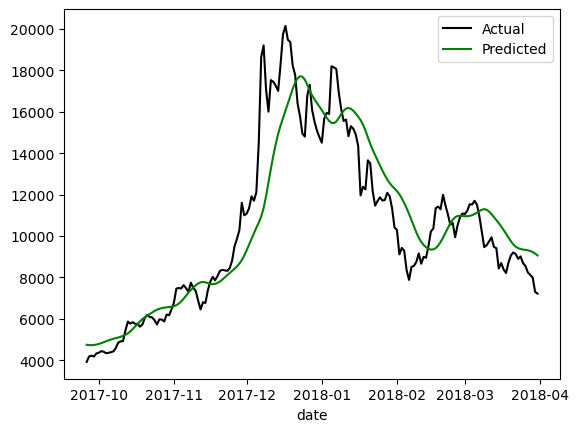

In [65]:
plt.plot(gru_forcast.index,gru_forcast['Actual'],color='black',label='Actual')
plt.plot(gru_forcast.index,gru_forcast['Predicted'],color='green',label='Predicted')
plt.xlabel('date')
plt.legend()
plt.show()

In [66]:
print('mse value is '+str(mean_squared_error(gru_forcast['Actual'],gru_forcast['Predicted'])))
print('rmse value is '+str((mean_squared_error(gru_forcast['Actual'],gru_forcast['Predicted'])**(1/2))))
print('R2 value is '+str(r2_score(gru_forcast['Actual'],gru_forcast['Predicted'])))

      

mse value is 2998893.804436411
rmse value is 1731.7314469733494
R2 value is 0.8199117606953308


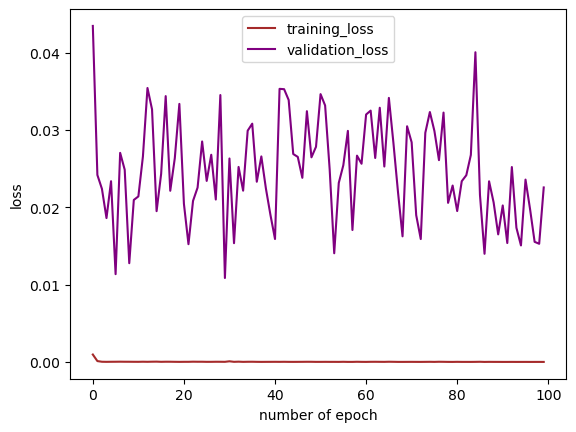

In [67]:
plt.plot(H5.epoch,H5.history['loss'],color='brown',label='training_loss')
plt.plot(H5.epoch,H5.history['val_loss'],color='purple',label='validation_loss')
plt.xlabel('number of epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

## Models and their Accuracy

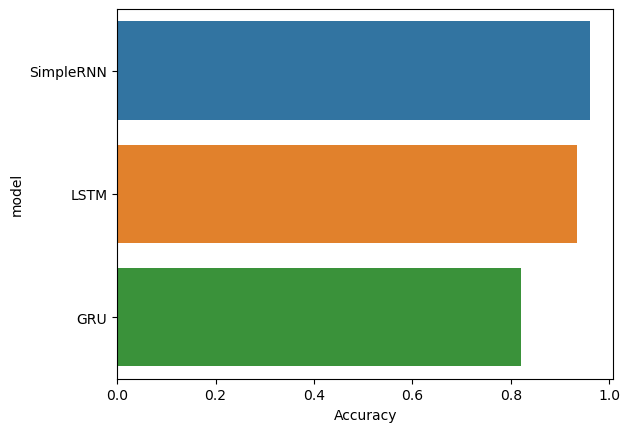

In [68]:
bar_df=pd.DataFrame({'model':['LSTM','SimpleRNN','GRU'],'Accuracy':[r2,r2_score(rnn_prediction['Actual'],rnn_prediction['Predicted']),
                                                                   r2_score(gru_forcast['Actual'],gru_forcast['Predicted'])]})
sor=bar_df.sort_values('Accuracy',ascending=False)
sns.barplot(data=sor,x=sor['Accuracy'],y=sor['model'])
plt.show()